## Change sys.path to use my tensortrade instead of the one in env

In [1]:
import sys
sys.path.append("/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader")
print(sys.path)

['/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python36.zip', '/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python3.6', '/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python3.6/lib-dynload', '', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/IPython/extensions', '/Users/jasonfiacco/.ipython', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader']


## Read PredictIt Data Instead

In [2]:
import ssl
import pandas as pd

ssl._create_default_https_context = ssl._create_unverified_context # Only used if pandas gives a SSLError

def fetch_data(symbol):
    path = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/predictit_datasets/"
    filename = "{}.xlsx".format(symbol)



    df = pd.read_excel(path + filename, skiprows=4)
    df = df.set_index("Date")
    df = df.drop(df.columns[[7,8,9]], axis=1)
    df = df.drop("ID", 1)
    df.columns = [symbol + ":" + name.lower() for name in df.columns]

    return df

In [3]:
all_data = pd.concat([
    fetch_data("WARREN"),
    fetch_data("CRUZ"),
    fetch_data("MANCHIN"),
    fetch_data("SANDERS"),
    fetch_data("NELSON"),
    fetch_data("DONNELLY"),
    fetch_data("PELOSI"),
    fetch_data("MANAFORT"),
    fetch_data("BROWN"),
    fetch_data("RYAN"),
    fetch_data("STABENOW")
], axis=1)
all_data.head()

,WARREN:open,WARREN:low,WARREN:high,WARREN:close,WARREN:volume,WARREN:average,CRUZ:open,CRUZ:low,CRUZ:high,CRUZ:close,...,RYAN:high,RYAN:close,RYAN:volume,RYAN:average,STABENOW:open,STABENOW:low,STABENOW:high,STABENOW:close,STABENOW:volume,STABENOW:average
Date,,,,,,,,,,,,,,,,,,,,,
11/13/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/14/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/15/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/16/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/17/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0


## Plot the closing prices for all the markets

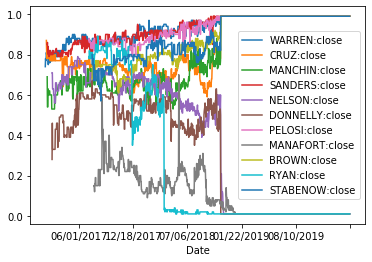

In [4]:
%matplotlib inline
closing_prices = all_data.loc[:, [("close" in name) for name in all_data.columns]]
closing_prices.plot()

## Slice just a specific time period from the dataframe

In [5]:
all_data.index = pd.to_datetime(all_data.index)

In [6]:
subset_data = all_data[(all_data.index >= '09-01-2017') & (all_data.index <= '09-04-2019')]
subset_data.head()

,WARREN:open,WARREN:low,WARREN:high,WARREN:close,WARREN:volume,WARREN:average,CRUZ:open,CRUZ:low,CRUZ:high,CRUZ:close,...,RYAN:high,RYAN:close,RYAN:volume,RYAN:average,STABENOW:open,STABENOW:low,STABENOW:high,STABENOW:close,STABENOW:volume,STABENOW:average
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,0.85,0.85,0.85,0.85,0,0.0000,0.77,0.77,0.78,0.78,...,0.82,0.82,0,0.0000,0.72,0.69,0.72,0.70,16,0.6981
2017-09-02,0.85,0.85,0.85,0.85,0,0.0000,0.78,0.78,0.78,0.78,...,0.82,0.82,0,0.0000,0.70,0.70,0.70,0.70,45,0.7000
2017-09-03,0.85,0.84,0.85,0.84,74,0.8400,0.78,0.78,0.78,0.78,...,0.82,0.82,0,0.0000,0.70,0.70,0.72,0.72,1,0.7200
2017-09-04,0.84,0.84,0.85,0.85,10,0.8500,0.78,0.78,0.78,0.78,...,0.82,0.81,120,0.8100,0.72,0.72,0.72,0.72,0,0.0000
2017-09-05,0.85,0.84,0.85,0.84,43,0.8479,0.78,0.78,0.78,0.78,...,0.87,0.81,52,0.8619,0.72,0.72,0.72,0.72,9,0.7200


## Define Exchanges

An exchange needs a name, an execution service, and streams of price data in order to function properly.

The setups supported right now are the simulated execution service using simulated or stochastic data. More execution services will be made available in the future, as well as price streams so that live data and execution can be supported.

In [7]:
from tensortrade.exchanges import Exchange
from tensortrade.exchanges.services.execution.simulated import execute_order
from tensortrade.data import Stream

#Exchange(name of exchange, service)
#It looks like each Stream takes a name, and then a list of the closing prices.

predictit_exch = Exchange("predictit", service=execute_order)(
    Stream("USD-WARREN", list(subset_data['WARREN:close'])),
    Stream("USD-CRUZ", list(subset_data['CRUZ:close'])),
    Stream("USD-MANCHIN", list(subset_data['MANCHIN:close'])),
    Stream("USD-SANDERS", list(subset_data['SANDERS:close'])),
    Stream("USD-NELSON", list(subset_data['NELSON:close'])),
    Stream("USD-DONNELLY", list(subset_data['DONNELLY:close'])),
    Stream("USD-PELOSI", list(subset_data['PELOSI:close'])),
    Stream("USD-MANAFORT", list(subset_data['MANAFORT:close'])),
    Stream("USD-BROWN", list(subset_data['BROWN:close'])),
    Stream("USD-RYAN", list(subset_data['RYAN:close'])),
    Stream("USD-STABENOW", list(subset_data['STABENOW:close']))
)

Now that the exchanges have been defined we can define our features that we would like to include, excluding the prices we have provided for the exchanges.

### Doing it without adding other features. Just use price 

In [8]:
#You still have to add "Streams" for all the standard columns open, high, low, close, volume in this case
from tensortrade.data import DataFeed, Module

with Module("predictit") as predictit_ns:
    predictit_nodes = [Stream(name, list(subset_data[name])) for name in subset_data.columns]
    

In [9]:
#Then create the Feed from it
feed = DataFeed([predictit_ns])
feed.next()

{'predictit:/WARREN:open': 0.85,
 'predictit:/WARREN:low': 0.85,
 'predictit:/WARREN:high': 0.85,
 'predictit:/WARREN:close': 0.85,
 'predictit:/WARREN:volume': 0,
 'predictit:/WARREN:average': 0.0,
 'predictit:/CRUZ:open': 0.77,
 'predictit:/CRUZ:low': 0.77,
 'predictit:/CRUZ:high': 0.78,
 'predictit:/CRUZ:close': 0.78,
 'predictit:/CRUZ:volume': 940,
 'predictit:/CRUZ:average': 0.7744,
 'predictit:/MANCHIN:open': 0.68,
 'predictit:/MANCHIN:low': 0.68,
 'predictit:/MANCHIN:high': 0.71,
 'predictit:/MANCHIN:close': 0.71,
 'predictit:/MANCHIN:volume': 185,
 'predictit:/MANCHIN:average': 0.6804,
 'predictit:/SANDERS:open': 0.85,
 'predictit:/SANDERS:low': 0.85,
 'predictit:/SANDERS:high': 0.85,
 'predictit:/SANDERS:close': 0.85,
 'predictit:/SANDERS:volume': 0,
 'predictit:/SANDERS:average': 0.0,
 'predictit:/NELSON:open': 0.72,
 'predictit:/NELSON:low': 0.72,
 'predictit:/NELSON:high': 0.72,
 'predictit:/NELSON:close': 0.72,
 'predictit:/NELSON:volume': 0,
 'predictit:/NELSON:average': 

## Portfolio

Make the portfolio using the any combinations of exchanges and intruments that the exchange supports

In [10]:
#I am going to have to add "instruments" for all 25 of the PredictIt markets I'm working with.
from tensortrade.instruments import USD, WARREN, CRUZ, MANCHIN, SANDERS, NELSON, DONNELLY,\
                                PELOSI, MANAFORT, BROWN, RYAN, STABENOW
from tensortrade.wallets import Wallet, Portfolio

portfolio = Portfolio(USD, [
    Wallet(predictit_exch, 10000 * USD),
    Wallet(predictit_exch, 0 * WARREN),
    Wallet(predictit_exch, 0 * CRUZ),
    Wallet(predictit_exch, 0 * MANCHIN),
    Wallet(predictit_exch, 0 * SANDERS),
    Wallet(predictit_exch, 0 * NELSON),
    Wallet(predictit_exch, 0 * DONNELLY),
    Wallet(predictit_exch, 0 * PELOSI),
    Wallet(predictit_exch, 0 * MANAFORT),
    Wallet(predictit_exch, 0 * BROWN),
    Wallet(predictit_exch, 0 * RYAN),
    Wallet(predictit_exch, 0 * STABENOW)
])

## Environment

In [11]:
from tensortrade.environments import TradingEnvironment

env = TradingEnvironment(
    feed=feed,
    portfolio=portfolio,
    action_scheme='simple',
    reward_scheme='simple',
    window_size=15,
    enable_logger=False,
    renderers = 'screenlog'
)

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/gym/logger.py:30: UserWarning:

WARN: Box bound precision lowered by casting to float32



In [12]:
env.feed.next()

{'predictit:/WARREN:open': 0.85,
 'predictit:/WARREN:low': 0.85,
 'predictit:/WARREN:high': 0.85,
 'predictit:/WARREN:close': 0.85,
 'predictit:/WARREN:volume': 0,
 'predictit:/WARREN:average': 0.0,
 'predictit:/CRUZ:open': 0.77,
 'predictit:/CRUZ:low': 0.77,
 'predictit:/CRUZ:high': 0.78,
 'predictit:/CRUZ:close': 0.78,
 'predictit:/CRUZ:volume': 940,
 'predictit:/CRUZ:average': 0.7744,
 'predictit:/MANCHIN:open': 0.68,
 'predictit:/MANCHIN:low': 0.68,
 'predictit:/MANCHIN:high': 0.71,
 'predictit:/MANCHIN:close': 0.71,
 'predictit:/MANCHIN:volume': 185,
 'predictit:/MANCHIN:average': 0.6804,
 'predictit:/SANDERS:open': 0.85,
 'predictit:/SANDERS:low': 0.85,
 'predictit:/SANDERS:high': 0.85,
 'predictit:/SANDERS:close': 0.85,
 'predictit:/SANDERS:volume': 0,
 'predictit:/SANDERS:average': 0.0,
 'predictit:/NELSON:open': 0.72,
 'predictit:/NELSON:low': 0.72,
 'predictit:/NELSON:high': 0.72,
 'predictit:/NELSON:close': 0.72,
 'predictit:/NELSON:volume': 0,
 'predictit:/NELSON:average': 

#### ^An environment doesn't just show the OHLCV for each instrument. It also shows free, locked, total, as well as "USD_BTC"

## Using 123's Ray example

In [13]:
#Import tensortrade
import tensortrade

# Define Exchanges
from tensortrade.exchanges import Exchange
from tensortrade.exchanges.services.execution.simulated import execute_order
from tensortrade.data import Stream


# Define External Data Feed (features)
import ta
from sklearn import preprocessing
from tensortrade.data import DataFeed, Module

# Portfolio
from tensortrade.instruments import USD, BTC
from tensortrade.wallets import Wallet, Portfolio
from tensortrade.actions import ManagedRiskOrders
from gym.spaces import Discrete

# Environment
from tensortrade.environments import TradingEnvironment


import gym
import ray
from ray import tune
from ray.tune import grid_search
from ray.tune.registry import register_env

import ray.rllib.agents.ppo as ppo
import ray.rllib.agents.dqn as dqn
from ray.tune.logger import pretty_print
from tensortrade.rewards import RiskAdjustedReturns
    
class RayTradingEnv(TradingEnvironment):
    def __init__(self):
        env = TradingEnvironment(
            feed=feed,
            portfolio=portfolio,
            action_scheme="simple",
            reward_scheme="simple",
            window_size=15,
            enable_logger=False,
            renderers = 'screenlog'
        ) 
        self.env = env
        self.action_space = self.env.action_space
        self.observation_space = self.env.observation_space
        

    def reset(self):
        return self.env.reset()

    def step(self, action):
        return self.env.step(action)

def env_creator(env_config):
    return RayTradingEnv()

register_env("ray_trading_env", env_creator)


ray.init(ignore_reinit_error=True, local_mode=True)
config = dqn.DEFAULT_CONFIG.copy()
config["num_gpus"] = 0
config["num_workers"] = 4
#config["num_envs_per_worker"] = 8
# config["eager"] = False

# config["timesteps_per_iteration"] = 100
# config["train_batch_size"] = 20
trainer = dqn.DQNTrainer(config=config, env="ray_trading_env")

config

2020-03-03 21:23:14,545	INFO trainer.py:420 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2020-03-03 21:23:14,548	ERROR logger.py:185 -- pip install 'ray[tune]' to see TensorBoard files.
2020-03-03 21:23:14,549	WARNING logger.py:287 -- Could not instantiate TBXLogger: No module named 'tensorboardX'.
2020-03-03 21:23:14,565	INFO trainer.py:580 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/gym/logger.py:30: UserWarning:

WARN: Box bound precision lowered by casting to float32

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2

{'num_workers': 4,
 'num_envs_per_worker': 1,
 'sample_batch_size': 4,
 'batch_mode': 'truncate_episodes',
 'num_gpus': 0,
 'train_batch_size': 32,
 'model': {'conv_filters': None,
  'conv_activation': 'relu',
  'fcnet_activation': 'tanh',
  'fcnet_hiddens': [256, 256],
  'free_log_std': False,
  'no_final_linear': False,
  'vf_share_layers': True,
  'use_lstm': False,
  'max_seq_len': 20,
  'lstm_cell_size': 256,
  'lstm_use_prev_action_reward': False,
  'state_shape': None,
  'framestack': True,
  'dim': 84,
  'grayscale': False,
  'zero_mean': True,
  'custom_model': None,
  'custom_action_dist': None,
  'custom_options': {},
  'custom_preprocessor': None},
 'optimizer': {},
 'gamma': 0.99,
 'horizon': None,
 'soft_horizon': False,
 'no_done_at_end': False,
 'env_config': {},
 'env': None,
 'normalize_actions': False,
 'clip_rewards': None,
 'clip_actions': True,
 'preprocessor_pref': 'deepmind',
 'lr': 0.0005,
 'monitor': False,
 'log_level': 'WARN',
 'callbacks': {'on_episode_star

## Train using the old fashioned RLLib way

In [18]:

for i in range(10):
    # Perform one iteration of training the policy with PPO
    print("Training iteration {}...".format(i))
    result = trainer.train()
    print("result: {}".format(result))
    
    if i % 100 == 0:
        checkpoint = trainer.save()
        print("checkpoint saved at", checkpoint)

Training iteration 0...


/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning:

Mean of empty slice.

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



result: {'episode_reward_max': -0.07917777901814049, 'episode_reward_min': -0.07917777901814049, 'episode_reward_mean': -0.07917777901814049, 'episode_len_mean': 231.0, 'episodes_this_iter': 1, 'policy_reward_min': {}, 'policy_reward_max': {}, 'policy_reward_mean': {}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [-0.07917777901814049], 'episode_lengths': [231]}, 'sampler_perf': {'mean_env_wait_ms': 30.23118369664128, 'mean_processing_ms': 0.24301072825556216, 'mean_inference_ms': 1.3211781799557651}, 'off_policy_estimator': {}, 'info': {'exploration_infos': [1.0, 1.0, 1.0, 1.0, 1.0], 'num_target_updates': 1, 'num_steps_trained': 0, 'num_steps_sampled': 1008, 'sample_time_ms': 528.891, 'replay_time_ms': nan, 'grad_time_ms': nan, 'update_time_ms': 19.556, 'opt_peak_throughput': 0.0, 'opt_samples': nan, 'learner': {}}, 'timesteps_this_iter': 1008, 'done': False, 'timesteps_total': 1008, 'episodes_total': 1, 'training_iteration': 1, 'experiment_id': 'b003e5f53353495ebd520fe8ea71

result: {'episode_reward_max': 45.61448333452774, 'episode_reward_min': -0.07917777901814049, 'episode_reward_mean': 19.33637334561403, 'episode_len_mean': 456.6666666666667, 'episodes_this_iter': 1, 'policy_reward_min': {}, 'policy_reward_max': {}, 'policy_reward_mean': {}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [12.473814481332498, -0.07917777901814049, 45.61448333452774], 'episode_lengths': [681, 231, 458]}, 'sampler_perf': {'mean_env_wait_ms': 31.350341314536976, 'mean_processing_ms': 0.23026087481920313, 'mean_inference_ms': 1.2758857940972443}, 'off_policy_estimator': {}, 'info': {'exploration_infos': [1.0, 0.901216, 0.901216, 0.901216, 0.901216], 'num_target_updates': 5, 'num_steps_trained': 4032, 'num_steps_sampled': 3024, 'sample_time_ms': 478.158, 'replay_time_ms': 3.194, 'grad_time_ms': 9.196, 'update_time_ms': 18.762, 'opt_peak_throughput': 3479.622, 'opt_samples': 32.0, 'learner': {'default_policy': {'cur_lr': 0.0005000000237487257, 'mean_q': 3.4352071, 'mi

result: {'episode_reward_max': 45.61448333452774, 'episode_reward_min': -0.07917777901814049, 'episode_reward_mean': 22.60597178773067, 'episode_len_mean': 546.4, 'episodes_this_iter': 1, 'policy_reward_min': {}, 'policy_reward_max': {}, 'policy_reward_mean': {}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [23.729383185514305, -0.07917777901814049, 45.61448333452774, 12.473814481332498, 31.291355716296945], 'episode_lengths': [681, 231, 458, 681, 681]}, 'sampler_perf': {'mean_env_wait_ms': 31.33125047261321, 'mean_processing_ms': 0.2254412926131832, 'mean_inference_ms': 1.244663116644731}, 'off_policy_estimator': {}, 'info': {'exploration_infos': [1.0, 0.703648, 0.703648, 0.703648, 0.703648], 'num_target_updates': 9, 'num_steps_trained': 8064, 'num_steps_sampled': 5040, 'sample_time_ms': 438.652, 'replay_time_ms': 3.052, 'grad_time_ms': 8.891, 'update_time_ms': 18.735, 'opt_peak_throughput': 3599.112, 'opt_samples': 32.0, 'learner': {'default_policy': {'cur_lr': 0.0005000000

result: {'episode_reward_max': 76.54231491769683, 'episode_reward_min': -0.07917777901814049, 'episode_reward_mean': 35.56894147016873, 'episode_len_mean': 714.5714285714286, 'episodes_this_iter': 1, 'policy_reward_min': {}, 'policy_reward_max': {}, 'policy_reward_mean': {}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [59.410416434830964, -0.07917777901814049, 45.61448333452774, 12.473814481332498, 31.291355716296945, 23.729383185514305, 76.54231491769683], 'episode_lengths': [1589, 231, 458, 681, 681, 681, 681]}, 'sampler_perf': {'mean_env_wait_ms': 30.959213321614467, 'mean_processing_ms': 0.21723636440480062, 'mean_inference_ms': 1.2279858777055712}, 'off_policy_estimator': {}, 'info': {'exploration_infos': [1.0, 0.50608, 0.50608, 0.50608, 0.50608], 'num_target_updates': 13, 'num_steps_trained': 12096, 'num_steps_sampled': 7056, 'sample_time_ms': 437.471, 'replay_time_ms': 3.038, 'grad_time_ms': 8.933, 'update_time_ms': 18.421, 'opt_peak_throughput': 3582.11, 'opt_samples

result: {'episode_reward_max': 76.54231491769683, 'episode_reward_min': -0.07917777901814049, 'episode_reward_mean': 35.41097296292293, 'episode_len_mean': 707.1111111111111, 'episodes_this_iter': 1, 'policy_reward_min': {}, 'policy_reward_max': {}, 'policy_reward_mean': {}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [45.0912726410283, -0.07917777901814049, 45.61448333452774, 12.473814481332498, 31.291355716296945, 23.729383185514305, 76.54231491769683, 59.410416434830964, 24.62489373409698], 'episode_lengths': [681, 231, 458, 681, 681, 681, 681, 1589, 681]}, 'sampler_perf': {'mean_env_wait_ms': 30.81546680034927, 'mean_processing_ms': 0.21395863850195826, 'mean_inference_ms': 1.213424563871234}, 'off_policy_estimator': {}, 'info': {'exploration_infos': [1.0, 0.308512, 0.308512, 0.308512, 0.308512], 'num_target_updates': 17, 'num_steps_trained': 16128, 'num_steps_sampled': 9072, 'sample_time_ms': 431.928, 'replay_time_ms': 2.988, 'grad_time_ms': 9.175, 'update_time_ms': 18.

In [21]:
result['hist_stats']['episode_reward']

[76.87280873211759,
 14.216861343844199,
 -0.07917777901814049,
 45.61448333452774,
 12.473814481332498,
 31.291355716296945,
 23.729383185514305,
 76.54231491769683,
 59.410416434830964,
 24.62489373409698,
 45.0912726410283]

## OR train using the tune way (better so far)

In [14]:
analysis = tune.run(
        "DQN",
        name = "DQN5",
        checkpoint_at_end=True,
        stop={
            "timesteps_total": 100000,
        },
        config={
            "env": "ray_trading_env",
            "lr": grid_search([1e-6]),  # try different lrs
            "num_workers": 4,  # parallelism,

        },
    )

2020-03-03 21:23:22,918	INFO resource_spec.py:212 -- Starting Ray with 4.44 GiB memory available for workers and up to 2.24 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:23:22,926	INFO resource_spec.py:212 -- Starting Ray with 4.44 GiB memory available for workers and up to 2.24 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:23:22,929	INFO resource_spec.py:212 -- Starting Ray with 4.44 GiB memory available for workers and up to 2.24 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:23:22,962	ERROR logger.py:185 -- pip install 'ray[tune]' to see TensorBoard files.
2020-03-03 21:23:22,963	WARNING logger.py:287 -- Could not instantiate TBXLogger: No module named 'tensorboardX'.
/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/gym/logger.py:3

Trial name,status,loc,lr
DQN_ray_trading_env_1f0d2468,RUNNING,,


2020-03-03 21:24:08,262	INFO resource_spec.py:212 -- Starting Ray with 4.49 GiB memory available for workers and up to 2.25 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-24-08
  done: false
  episode_len_mean: 185.0
  episode_reward_max: 0.38554914692771114
  episode_reward_mean: 0.38554914692771114
  episode_reward_min: 0.38554914692771114
  episodes_this_iter: 1
  episodes_total: 1
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    grad_time_ms: .nan
    learner: {}
    num_steps_sampled: 1008
    num_steps_trained: 0
    num_target_updates: 1
    opt_peak_throughput: 0.0
    opt_samples: .nan
    replay_time_ms: .nan
    sample_time_ms: 536.134
    update_time_ms: 21.651
  iterations_since_restore: 1
  node_ip: 192.168.0.89
  num_healthy_workers: 4
  off_policy_estimator: {}
  perf:
    cpu_util_percent: 19.347169811320757
    ram_util_percent: 64.76037735849056
  pid: 28167
  policy_reward_max: {}
  policy_reward_mean: {}

2020-03-03 21:24:46,320	WARNING util.py:132 -- The `process_trial` operation took 38.05730414390564 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,0.385549,36.8945,1008,1


2020-03-03 21:24:46,327	INFO resource_spec.py:212 -- Starting Ray with 4.54 GiB memory available for workers and up to 2.28 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:24:46,328	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-24-46
  done: false
  episode_len_mean: 277.5
  episode_reward_max: 0.38554914692771114
  episode_reward_mean: 0.195392185092488
  episode_reward_min: 0.005235223257264887
  episodes_this_iter: 1
  episodes_total: 2
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    grad_time_ms: 11.965
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 1.3505300283432007
        mean_q: 0.36134421825408936
        mean_td_error: -1.0779471397399902
        min_q: -0.7385441064834595
        model: {}
    num_steps_sampled: 2016
    num_steps_trained: 2016
    num_target_updates: 3
    opt_peak_throughput: 2674.416
    opt_samples: 32.0
    replay_time_ms: 4.353
    sample_time_ms: 557.724
    update_time_ms: 23.11
  iterations_since_resto

2020-03-03 21:25:23,082	WARNING util.py:132 -- The `process_trial` operation took 36.75376892089844 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,0.195392,74.9407,2016,2


2020-03-03 21:25:23,090	INFO resource_spec.py:212 -- Starting Ray with 4.54 GiB memory available for workers and up to 2.29 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-25-23
  done: false
  episode_len_mean: 461.5
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: 0.3179324988625094
  episode_reward_min: -0.031477922154352966
  episodes_this_iter: 2
  episodes_total: 4
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.9012159705162048
    - 0.9012159705162048
    - 0.9012159705162048
    - 0.9012159705162048
    grad_time_ms: 11.658
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 1.9293203353881836
        mean_q: 0.40706104040145874
        mean_td_error: -1.3042404651641846
        min_q: -1.196315050125122
        model: {}
    num_steps_sampled: 3024
    num_steps_trained: 4032
    num_target_updates: 5
    opt_peak_throughput: 2744.823
    opt_samples: 32.0
    replay_time_ms: 4.089
    sample_time_ms

2020-03-03 21:26:00,862	WARNING util.py:132 -- The `process_trial` operation took 37.76847577095032 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,0.317932,111.681,3024,3


2020-03-03 21:26:00,868	INFO resource_spec.py:212 -- Starting Ray with 4.54 GiB memory available for workers and up to 2.27 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:26:00,869	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-26-00
  done: false
  episode_len_mean: 405.4
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: 0.2195478338869416
  episode_reward_min: -0.17399082601532945
  episodes_this_iter: 1
  episodes_total: 5
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.8024320006370544
    - 0.8024320006370544
    - 0.8024320006370544
    - 0.8024320006370544
    grad_time_ms: 11.378
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 2.201785087585449
        mean_q: 0.5659394264221191
        mean_td_error: -1.2614190578460693
        min_q: -1.105778455734253
        model: {}
    num_steps_sampled: 4032
    num_steps_trained: 6048
    num_target_updates: 7
    opt_peak_throughput: 2812.503
    opt_samples: 32.0
    replay_time_ms: 4.368
    sample_time_ms: 5

2020-03-03 21:26:38,858	WARNING util.py:132 -- The `process_trial` operation took 37.98918700218201 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,0.219548,149.423,4032,4


2020-03-03 21:26:38,864	INFO resource_spec.py:212 -- Starting Ray with 4.39 GiB memory available for workers and up to 2.21 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-26-38
  done: false
  episode_len_mean: 490.6666666666667
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: 0.20289170109267532
  episode_reward_min: -0.17399082601532945
  episodes_this_iter: 1
  episodes_total: 6
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.7036479711532593
    - 0.7036479711532593
    - 0.7036479711532593
    - 0.7036479711532593
    grad_time_ms: 11.148
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 1.94806706905365
        mean_q: 0.6305060386657715
        mean_td_error: -1.1100319623947144
        min_q: -0.47646766901016235
        model: {}
    num_steps_sampled: 5040
    num_steps_trained: 8064
    num_target_updates: 9
    opt_peak_throughput: 2870.495
    opt_samples: 32.0
    replay_time_ms: 3.854
    sam

2020-03-03 21:27:11,996	WARNING util.py:132 -- The `process_trial` operation took 33.13202786445618 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,0.202892,187.399,5040,5


2020-03-03 21:27:12,002	INFO resource_spec.py:212 -- Starting Ray with 4.59 GiB memory available for workers and up to 2.32 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:27:12,003	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-27-11
  done: false
  episode_len_mean: 597.25
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: 0.16861495989267183
  episode_reward_min: -0.23227946473148997
  episodes_this_iter: 2
  episodes_total: 8
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.6048640012741089
    - 0.6048640012741089
    - 0.6048640012741089
    - 0.6048640012741089
    grad_time_ms: 11.048
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 2.49438738822937
        mean_q: 0.6784818768501282
        mean_td_error: -1.0810697078704834
        min_q: -0.9707392454147339
        model: {}
    num_steps_sampled: 6048
    num_steps_trained: 10080
    num_target_updates: 11
    opt_peak_throughput: 2896.444
    opt_samples: 32.0
    replay_time_ms: 3.477
    sample_time_m

2020-03-03 21:27:44,917	WARNING util.py:132 -- The `process_trial` operation took 32.91369390487671 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,0.168615,220.518,6048,6


2020-03-03 21:27:44,922	INFO resource_spec.py:212 -- Starting Ray with 4.64 GiB memory available for workers and up to 2.32 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-27-44
  done: false
  episode_len_mean: 551.0
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: 0.12830868706110868
  episode_reward_min: -0.23227946473148997
  episodes_this_iter: 1
  episodes_total: 9
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.5060799717903137
    - 0.5060799717903137
    - 0.5060799717903137
    - 0.5060799717903137
    grad_time_ms: 11.02
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.688185453414917
        mean_q: 0.9879716634750366
        mean_td_error: -1.0136404037475586
        min_q: -0.3124847412109375
        model: {}
    num_steps_sampled: 7056
    num_steps_trained: 12096
    num_target_updates: 13
    opt_peak_throughput: 2903.845
    opt_samples: 32.0
    replay_time_ms: 3.653
    sample_time_ms

2020-03-03 21:28:17,754	WARNING util.py:132 -- The `process_trial` operation took 32.83086609840393 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,0.128309,253.419,7056,7


2020-03-03 21:28:17,760	INFO resource_spec.py:212 -- Starting Ray with 4.54 GiB memory available for workers and up to 2.29 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:28:17,761	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-28-17
  done: false
  episode_len_mean: 587.6
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: 0.1849579704561696
  episode_reward_min: -0.23227946473148997
  episodes_this_iter: 1
  episodes_total: 10
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.40729600191116333
    - 0.40729600191116333
    - 0.40729600191116333
    - 0.40729600191116333
    grad_time_ms: 10.881
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.1972837448120117
        mean_q: 1.1654003858566284
        mean_td_error: -0.7796398997306824
        min_q: -0.34669142961502075
        model: {}
    num_steps_sampled: 8064
    num_steps_trained: 14112
    num_target_updates: 15
    opt_peak_throughput: 2940.927
    opt_samples: 32.0
    replay_time_ms: 3.644
    sample_

2020-03-03 21:28:48,842	WARNING util.py:132 -- The `process_trial` operation took 31.080654859542847 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,0.184958,286.237,8064,8


2020-03-03 21:28:48,848	INFO resource_spec.py:212 -- Starting Ray with 4.69 GiB memory available for workers and up to 2.35 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-28-48
  done: false
  episode_len_mean: 642.5
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: 0.08744716848042393
  episode_reward_min: -0.6864482346388263
  episodes_this_iter: 2
  episodes_total: 12
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.30851200222969055
    - 0.30851200222969055
    - 0.30851200222969055
    - 0.30851200222969055
    grad_time_ms: 10.672
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 2.696017026901245
        mean_q: 1.074620008468628
        mean_td_error: -0.8919411897659302
        min_q: -0.6383998394012451
        model: {}
    num_steps_sampled: 9072
    num_steps_trained: 16128
    num_target_updates: 17
    opt_peak_throughput: 2998.528
    opt_samples: 32.0
    replay_time_ms: 3.494
    sample_tim

2020-03-03 21:29:19,697	WARNING util.py:132 -- The `process_trial` operation took 30.84856390953064 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,0.0874472,317.3,9072,9


2020-03-03 21:29:19,704	INFO resource_spec.py:212 -- Starting Ray with 4.59 GiB memory available for workers and up to 2.3 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:29:19,705	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-29-19
  done: false
  episode_len_mean: 607.0
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: 0.0624522761704026
  episode_reward_min: -0.6864482346388263
  episodes_this_iter: 1
  episodes_total: 13
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.20972800254821777
    - 0.20972800254821777
    - 0.20972800254821777
    - 0.20972800254821777
    grad_time_ms: 11.35
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 2.816816806793213
        mean_q: 1.3513716459274292
        mean_td_error: -0.6556572914123535
        min_q: -0.2707067131996155
        model: {}
    num_steps_sampled: 10080
    num_steps_trained: 18144
    num_target_updates: 19
    opt_peak_throughput: 2819.315
    opt_samples: 32.0
    replay_time_ms: 3.941
    sample_tim

2020-03-03 21:29:55,681	WARNING util.py:132 -- The `process_trial` operation took 35.97545123100281 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,0.0624523,348.136,10080,10


2020-03-03 21:29:55,687	INFO resource_spec.py:212 -- Starting Ray with 4.54 GiB memory available for workers and up to 2.28 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-29-55
  done: false
  episode_len_mean: 648.3333333333334
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: 0.03303609208350626
  episode_reward_min: -0.6864482346388263
  episodes_this_iter: 2
  episodes_total: 15
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.110944002866745
    - 0.110944002866745
    - 0.110944002866745
    - 0.110944002866745
    grad_time_ms: 11.416
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.0253450870513916
        mean_q: 1.4489859342575073
        mean_td_error: -0.6161065101623535
        min_q: -0.3041800856590271
        model: {}
    num_steps_sampled: 11088
    num_steps_trained: 20160
    num_target_updates: 21
    opt_peak_throughput: 2803.14
    opt_samples: 32.0
    replay_time_ms: 3.805
    samp

2020-03-03 21:30:27,991	WARNING util.py:132 -- The `process_trial` operation took 32.30353307723999 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,0.0330361,384.095,11088,11


2020-03-03 21:30:27,999	INFO resource_spec.py:212 -- Starting Ray with 4.64 GiB memory available for workers and up to 2.34 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:30:28,000	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-30-27
  done: false
  episode_len_mean: 665.125
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: 0.04558415516225573
  episode_reward_min: -0.6864482346388263
  episodes_this_iter: 1
  episodes_total: 16
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.662
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.2240967750549316
        mean_q: 1.6834946870803833
        mean_td_error: -0.5612755417823792
        min_q: -0.19263264536857605
        model: {}
    num_steps_sampled: 12096
    num_steps_trained: 22176
    num_target_updates: 23
    opt_peak_throughput: 3001.345
    opt_samples: 32.0
    replay_time_ms: 3.564
    

2020-03-03 21:30:59,036	WARNING util.py:132 -- The `process_trial` operation took 31.035024881362915 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,0.0455842,416.385,12096,12


2020-03-03 21:30:59,042	INFO resource_spec.py:212 -- Starting Ray with 4.64 GiB memory available for workers and up to 2.33 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-30-59
  done: false
  episode_len_mean: 636.6470588235294
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: 0.016930088196011436
  episode_reward_min: -0.6864482346388263
  episodes_this_iter: 1
  episodes_total: 17
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.941
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.1680595874786377
        mean_q: 1.5210518836975098
        mean_td_error: -0.7564770579338074
        min_q: -0.3206978142261505
        model: {}
    num_steps_sampled: 13104
    num_steps_trained: 24192
    num_target_updates: 25
    opt_peak_throughput: 2924.854
    opt_samples: 32.0
    replay_time_ms: 

2020-03-03 21:31:29,584	WARNING util.py:132 -- The `process_trial` operation took 30.541483163833618 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,0.0169301,447.404,13104,13


2020-03-03 21:31:29,589	INFO resource_spec.py:212 -- Starting Ray with 4.69 GiB memory available for workers and up to 2.34 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:31:29,590	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-31-29
  done: false
  episode_len_mean: 666.1578947368421
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: 0.04997007919609878
  episode_reward_min: -0.6864482346388263
  episodes_this_iter: 2
  episodes_total: 19
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.764
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.203583240509033
        mean_q: 1.581033706665039
        mean_td_error: -0.7119565010070801
        min_q: -0.15993928909301758
        model: {}
    num_steps_sampled: 14112
    num_steps_trained: 26208
    num_target_updates: 27
    opt_peak_throughput: 2972.918
    opt_samples: 32.0
    replay_time_ms: 3.

2020-03-03 21:31:59,927	WARNING util.py:132 -- The `process_trial` operation took 30.336451768875122 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,0.0499701,477.933,14112,14


2020-03-03 21:31:59,932	INFO resource_spec.py:212 -- Starting Ray with 4.64 GiB memory available for workers and up to 2.34 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-31-59
  done: false
  episode_len_mean: 678.7
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: 0.017641994500387108
  episode_reward_min: -0.6864482346388263
  episodes_this_iter: 1
  episodes_total: 20
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.803
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.5616488456726074
        mean_q: 1.7779544591903687
        mean_td_error: -0.43442070484161377
        min_q: -0.0991954505443573
        model: {}
    num_steps_sampled: 15120
    num_steps_trained: 28224
    num_target_updates: 29
    opt_peak_throughput: 2962.125
    opt_samples: 32.0
    replay_time_ms: 3.43
    sa

2020-03-03 21:32:34,781	WARNING util.py:132 -- The `process_trial` operation took 34.84816598892212 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,0.017642,508.257,15120,15


2020-03-03 21:32:34,787	INFO resource_spec.py:212 -- Starting Ray with 4.39 GiB memory available for workers and up to 2.21 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:32:34,788	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-32-34
  done: false
  episode_len_mean: 655.0
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: 0.007815776362940275
  episode_reward_min: -0.6864482346388263
  episodes_this_iter: 1
  episodes_total: 21
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.621
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.299123525619507
        mean_q: 1.8247580528259277
        mean_td_error: -0.40661853551864624
        min_q: -0.02751070261001587
        model: {}
    num_steps_sampled: 16128
    num_steps_trained: 30240
    num_target_updates: 31
    opt_peak_throughput: 2535.457
    opt_samples: 32.0
    replay_time_ms: 4.555
    s

2020-03-03 21:33:07,508	WARNING util.py:132 -- The `process_trial` operation took 32.71959686279297 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,0.00781578,543.092,16128,16


2020-03-03 21:33:07,514	INFO resource_spec.py:212 -- Starting Ray with 4.54 GiB memory available for workers and up to 2.29 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-33-07
  done: false
  episode_len_mean: 677.7826086956521
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: -0.05320047046422961
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 2
  episodes_total: 23
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.641
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.487704277038574
        mean_q: 1.8158591985702515
        mean_td_error: -0.3619157075881958
        min_q: 0.0533466637134552
        model: {}
    num_steps_sampled: 17136
    num_steps_trained: 32256
    num_target_updates: 33
    opt_peak_throughput: 3007.208
    opt_samples: 32.0
    replay_time_ms: 3.

2020-03-03 21:33:38,223	WARNING util.py:132 -- The `process_trial` operation took 30.70766806602478 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.0532005,575.798,17136,17


2020-03-03 21:33:38,228	INFO resource_spec.py:212 -- Starting Ray with 4.59 GiB memory available for workers and up to 2.3 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:33:38,229	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-33-38
  done: false
  episode_len_mean: 687.75
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: -0.023290645317513053
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 1
  episodes_total: 24
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.899
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.5487570762634277
        mean_q: 1.4883928298950195
        mean_td_error: -0.7333341836929321
        min_q: -0.6902481913566589
        model: {}
    num_steps_sampled: 18144
    num_steps_trained: 34272
    num_target_updates: 35
    opt_peak_throughput: 2936.102
    opt_samples: 32.0
    replay_time_ms: 3.386
    

2020-03-03 21:34:10,681	WARNING util.py:132 -- The `process_trial` operation took 32.45182728767395 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.0232906,606.492,18144,18


2020-03-03 21:34:10,687	INFO resource_spec.py:212 -- Starting Ray with 4.49 GiB memory available for workers and up to 2.27 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-34-10
  done: false
  episode_len_mean: 677.0769230769231
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: -0.0229269281925473
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 2
  episodes_total: 26
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.335
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.528923988342285
        mean_q: 1.95918869972229
        mean_td_error: -0.5251691937446594
        min_q: 0.07133883237838745
        model: {}
    num_steps_sampled: 19152
    num_steps_trained: 36288
    num_target_updates: 37
    opt_peak_throughput: 2594.196
    opt_samples: 32.0
    replay_time_ms: 4.08

2020-03-03 21:34:43,911	WARNING util.py:132 -- The `process_trial` operation took 33.22236919403076 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.0229269,638.931,19152,19


2020-03-03 21:34:43,916	INFO resource_spec.py:212 -- Starting Ray with 4.59 GiB memory available for workers and up to 2.31 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:34:43,917	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-34-43
  done: false
  episode_len_mean: 685.9629629629629
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: -0.026045636168200895
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 1
  episodes_total: 27
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.794
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.6960978507995605
        mean_q: 1.9147629737854004
        mean_td_error: -0.3750339150428772
        min_q: 0.05632480978965759
        model: {}
    num_steps_sampled: 20160
    num_steps_trained: 38304
    num_target_updates: 39
    opt_peak_throughput: 2964.683
    opt_samples: 32.0
    replay_time_ms:

2020-03-03 21:35:14,386	WARNING util.py:132 -- The `process_trial` operation took 30.468286991119385 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.0260456,672.14,20160,20


2020-03-03 21:35:14,391	INFO resource_spec.py:212 -- Starting Ray with 4.64 GiB memory available for workers and up to 2.34 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-35-14
  done: false
  episode_len_mean: 694.2142857142857
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: -0.058217057053047395
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 1
  episodes_total: 28
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.982
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.3579838275909424
        mean_q: 1.8505405187606812
        mean_td_error: -0.44476234912872314
        min_q: 0.018744349479675293
        model: {}
    num_steps_sampled: 21168
    num_steps_trained: 40320
    num_target_updates: 41
    opt_peak_throughput: 2913.906
    opt_samples: 32.0
    replay_time_m

2020-03-03 21:35:44,928	WARNING util.py:132 -- The `process_trial` operation took 30.536301136016846 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.0582171,702.595,21168,21


2020-03-03 21:35:44,934	INFO resource_spec.py:212 -- Starting Ray with 4.54 GiB memory available for workers and up to 2.28 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:35:44,935	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-35-44
  done: false
  episode_len_mean: 684.5333333333333
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: -0.07689705999228051
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 2
  episodes_total: 30
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.641
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.635761022567749
        mean_q: 1.9927568435668945
        mean_td_error: -0.41881054639816284
        min_q: -0.07945475727319717
        model: {}
    num_steps_sampled: 22176
    num_steps_trained: 42336
    num_target_updates: 43
    opt_peak_throughput: 3007.35
    opt_samples: 32.0
    replay_time_ms: 

2020-03-03 21:36:15,079	WARNING util.py:132 -- The `process_trial` operation took 30.143343925476074 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.0768971,733.119,22176,22


2020-03-03 21:36:15,084	INFO resource_spec.py:212 -- Starting Ray with 4.64 GiB memory available for workers and up to 2.34 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-36-15
  done: false
  episode_len_mean: 692.0322580645161
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: -0.08254763380649825
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 1
  episodes_total: 31
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.971
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.809393882751465
        mean_q: 1.9125056266784668
        mean_td_error: -0.45179057121276855
        min_q: 0.4669240713119507
        model: {}
    num_steps_sampled: 23184
    num_steps_trained: 44352
    num_target_updates: 45
    opt_peak_throughput: 2916.654
    opt_samples: 32.0
    replay_time_ms: 3

2020-03-03 21:36:45,845	WARNING util.py:132 -- The `process_trial` operation took 30.760090827941895 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.0825476,763.249,23184,23


2020-03-03 21:36:45,851	INFO resource_spec.py:212 -- Starting Ray with 4.64 GiB memory available for workers and up to 2.34 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:36:45,851	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-36-45
  done: false
  episode_len_mean: 699.0625
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: -0.09638271557028283
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 1
  episodes_total: 32
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.576
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.3179268836975098
        mean_q: 1.9541418552398682
        mean_td_error: -0.35800984501838684
        min_q: 0.2382289171218872
        model: {}
    num_steps_sampled: 24192
    num_steps_trained: 46368
    num_target_updates: 47
    opt_peak_throughput: 3025.764
    opt_samples: 32.0
    replay_time_ms: 3.351
   

2020-03-03 21:37:16,001	WARNING util.py:132 -- The `process_trial` operation took 30.149433135986328 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.0963827,793.996,24192,24


2020-03-03 21:37:16,007	INFO resource_spec.py:212 -- Starting Ray with 4.64 GiB memory available for workers and up to 2.34 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-37-16
  done: false
  episode_len_mean: 690.2352941176471
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: -0.09503914765563634
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 2
  episodes_total: 34
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.73
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.2273268699645996
        mean_q: 1.6719870567321777
        mean_td_error: -0.5516307353973389
        min_q: -0.5946595668792725
        model: {}
    num_steps_sampled: 25200
    num_steps_trained: 48384
    num_target_updates: 49
    opt_peak_throughput: 2982.318
    opt_samples: 32.0
    replay_time_ms: 3

2020-03-03 21:37:48,360	WARNING util.py:132 -- The `process_trial` operation took 32.35258197784424 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.0950391,824.132,25200,25


2020-03-03 21:37:48,366	INFO resource_spec.py:212 -- Starting Ray with 4.59 GiB memory available for workers and up to 2.31 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:37:48,367	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-37-48
  done: false
  episode_len_mean: 696.7142857142857
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: -0.11450296233590146
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 1
  episodes_total: 35
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.767
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.628511667251587
        mean_q: 2.3483572006225586
        mean_td_error: -0.0821160227060318
        min_q: 0.4931182265281677
        model: {}
    num_steps_sampled: 26208
    num_steps_trained: 50400
    num_target_updates: 51
    opt_peak_throughput: 2971.937
    opt_samples: 32.0
    replay_time_ms: 3.

2020-03-03 21:38:19,292	WARNING util.py:132 -- The `process_trial` operation took 30.92492389678955 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.114503,856.472,26208,26


2020-03-03 21:38:19,298	INFO resource_spec.py:212 -- Starting Ray with 4.64 GiB memory available for workers and up to 2.32 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-38-19
  done: false
  episode_len_mean: 688.7297297297297
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: -0.11936624850822908
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 2
  episodes_total: 37
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.919
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.551266670227051
        mean_q: 2.1553244590759277
        mean_td_error: -0.4008690118789673
        min_q: -0.3917541801929474
        model: {}
    num_steps_sampled: 27216
    num_steps_trained: 52416
    num_target_updates: 53
    opt_peak_throughput: 2930.608
    opt_samples: 32.0
    replay_time_ms: 3

2020-03-03 21:38:50,199	WARNING util.py:132 -- The `process_trial` operation took 30.90010380744934 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.119366,887.383,27216,27


2020-03-03 21:38:50,207	INFO resource_spec.py:212 -- Starting Ray with 4.64 GiB memory available for workers and up to 2.32 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:38:50,208	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-38-50
  done: false
  episode_len_mean: 694.7368421052631
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: -0.13786987542028337
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 1
  episodes_total: 38
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.702
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.452610492706299
        mean_q: 2.2002077102661133
        mean_td_error: -0.32927370071411133
        min_q: 0.6884543299674988
        model: {}
    num_steps_sampled: 28224
    num_steps_trained: 54432
    num_target_updates: 55
    opt_peak_throughput: 2990.091
    opt_samples: 32.0
    replay_time_ms: 3

2020-03-03 21:39:20,763	WARNING util.py:132 -- The `process_trial` operation took 30.554306030273438 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.13787,918.26,28224,28


2020-03-03 21:39:20,768	INFO resource_spec.py:212 -- Starting Ray with 4.64 GiB memory available for workers and up to 2.32 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-39-20
  done: false
  episode_len_mean: 700.4358974358975
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: -0.12785968283875743
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 1
  episodes_total: 39
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.833
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.474581718444824
        mean_q: 2.283792495727539
        mean_td_error: -0.20907922089099884
        min_q: 0.5396838784217834
        model: {}
    num_steps_sampled: 29232
    num_steps_trained: 56448
    num_target_updates: 57
    opt_peak_throughput: 2953.969
    opt_samples: 32.0
    replay_time_ms: 3.

2020-03-03 21:39:51,052	WARNING util.py:132 -- The `process_trial` operation took 30.282299995422363 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.12786,948.8,29232,29


2020-03-03 21:39:51,057	INFO resource_spec.py:212 -- Starting Ray with 4.64 GiB memory available for workers and up to 2.32 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:39:51,058	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-39-51
  done: false
  episode_len_mean: 693.0487804878048
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: -0.11438326167162047
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 2
  episodes_total: 41
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.819
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.6067755222320557
        mean_q: 2.215927839279175
        mean_td_error: -0.3479786217212677
        min_q: -0.18556395173072815
        model: {}
    num_steps_sampled: 30240
    num_steps_trained: 58464
    num_target_updates: 59
    opt_peak_throughput: 2957.628
    opt_samples: 32.0
    replay_time_ms: 

2020-03-03 21:40:21,182	WARNING util.py:132 -- The `process_trial` operation took 30.12318992614746 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.114383,979.069,30240,30


2020-03-03 21:40:21,188	INFO resource_spec.py:212 -- Starting Ray with 4.59 GiB memory available for workers and up to 2.31 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-40-21
  done: false
  episode_len_mean: 698.3809523809524
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: -0.13278558512394895
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 1
  episodes_total: 42
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.05
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.4810423851013184
        mean_q: 2.378516674041748
        mean_td_error: -0.11519166082143784
        min_q: -0.01929347962141037
        model: {}
    num_steps_sampled: 31248
    num_steps_trained: 60480
    num_target_updates: 61
    opt_peak_throughput: 2895.8
    opt_samples: 32.0
    replay_time_ms: 3.

2020-03-03 21:40:52,333	WARNING util.py:132 -- The `process_trial` operation took 31.143638134002686 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.132786,1009.18,31248,31


2020-03-03 21:40:52,342	INFO resource_spec.py:212 -- Starting Ray with 4.59 GiB memory available for workers and up to 2.31 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:40:52,343	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-40-52
  done: false
  episode_len_mean: 703.4651162790698
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: -0.13804939118518156
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 1
  episodes_total: 43
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.843
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.005443572998047
        mean_q: 2.14847469329834
        mean_td_error: -0.49926915764808655
        min_q: 0.014752380549907684
        model: {}
    num_steps_sampled: 32256
    num_steps_trained: 62496
    num_target_updates: 63
    opt_peak_throughput: 2951.332
    opt_samples: 32.0
    replay_time_ms: 3

2020-03-03 21:41:22,680	WARNING util.py:132 -- The `process_trial` operation took 30.336660146713257 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.138049,1040.31,32256,32


2020-03-03 21:41:22,686	INFO resource_spec.py:212 -- Starting Ray with 4.59 GiB memory available for workers and up to 2.31 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-41-22
  done: false
  episode_len_mean: 696.6
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: -0.14365609618346317
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 2
  episodes_total: 45
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.989
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.73066782951355
        mean_q: 2.1714608669281006
        mean_td_error: -0.4853072166442871
        min_q: -0.034326136112213135
        model: {}
    num_steps_sampled: 33264
    num_steps_trained: 64512
    num_target_updates: 64
    opt_peak_throughput: 2912.073
    opt_samples: 32.0
    replay_time_ms: 3.39
    sam

2020-03-03 21:41:53,028	WARNING util.py:132 -- The `process_trial` operation took 30.341579914093018 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.143656,1070.63,33264,33


2020-03-03 21:41:53,034	INFO resource_spec.py:212 -- Starting Ray with 4.59 GiB memory available for workers and up to 2.31 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:41:53,035	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-41-53
  done: false
  episode_len_mean: 701.3913043478261
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: -0.1369379624238806
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 1
  episodes_total: 46
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.989
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.69227933883667
        mean_q: 2.4383201599121094
        mean_td_error: -0.13359086215496063
        min_q: -0.32393819093704224
        model: {}
    num_steps_sampled: 34272
    num_steps_trained: 66528
    num_target_updates: 66
    opt_peak_throughput: 2912.022
    opt_samples: 32.0
    replay_time_ms: 3

2020-03-03 21:42:23,359	WARNING util.py:132 -- The `process_trial` operation took 30.323446035385132 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.136938,1100.96,34272,34


2020-03-03 21:42:23,365	INFO resource_spec.py:212 -- Starting Ray with 4.59 GiB memory available for workers and up to 2.31 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-42-23
  done: false
  episode_len_mean: 710.375
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: -0.1485745738297291
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 2
  episodes_total: 48
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.864
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.5726051330566406
        mean_q: 2.6371102333068848
        mean_td_error: -0.021469317376613617
        min_q: 0.3679823875427246
        model: {}
    num_steps_sampled: 35280
    num_steps_trained: 68544
    num_target_updates: 68
    opt_peak_throughput: 2945.399
    opt_samples: 32.0
    replay_time_ms: 3.281
    

2020-03-03 21:42:53,910	WARNING util.py:132 -- The `process_trial` operation took 30.544453144073486 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.148575,1131.26,35280,35


2020-03-03 21:42:53,916	INFO resource_spec.py:212 -- Starting Ray with 4.59 GiB memory available for workers and up to 2.32 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:42:53,917	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-42-53
  done: false
  episode_len_mean: 699.5714285714286
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: -0.14587843773919654
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 1
  episodes_total: 49
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.922
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.756417751312256
        mean_q: 2.3269312381744385
        mean_td_error: -0.07977920025587082
        min_q: -0.195040762424469
        model: {}
    num_steps_sampled: 36288
    num_steps_trained: 70560
    num_target_updates: 70
    opt_peak_throughput: 2929.962
    opt_samples: 32.0
    replay_time_ms: 3

2020-03-03 21:43:24,364	WARNING util.py:132 -- The `process_trial` operation took 30.44617199897766 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.145878,1161.8,36288,36


2020-03-03 21:43:24,369	INFO resource_spec.py:212 -- Starting Ray with 4.59 GiB memory available for workers and up to 2.32 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-43-24
  done: false
  episode_len_mean: 703.92
  episode_reward_max: 0.9124235474194144
  episode_reward_mean: -0.14615233444334344
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 1
  episodes_total: 50
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.71
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.4908900260925293
        mean_q: 2.0836033821105957
        mean_td_error: -0.5780301094055176
        min_q: -0.39376920461654663
        model: {}
    num_steps_sampled: 37296
    num_steps_trained: 72576
    num_target_updates: 72
    opt_peak_throughput: 2987.868
    opt_samples: 32.0
    replay_time_ms: 3.287
    s

2020-03-03 21:43:54,464	WARNING util.py:132 -- The `process_trial` operation took 30.094534873962402 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.146152,1192.23,37296,37


2020-03-03 21:43:54,470	INFO resource_spec.py:212 -- Starting Ray with 4.59 GiB memory available for workers and up to 2.31 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:43:54,470	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-43-54
  done: false
  episode_len_mean: 712.1153846153846
  episode_reward_max: 1.3441400218173243
  episode_reward_mean: -0.1323146912464695
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 2
  episodes_total: 52
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.836
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.026552200317383
        mean_q: 2.6729636192321777
        mean_td_error: -0.17912453413009644
        min_q: 0.3580855131149292
        model: {}
    num_steps_sampled: 38304
    num_steps_trained: 74592
    num_target_updates: 74
    opt_peak_throughput: 2952.988
    opt_samples: 32.0
    replay_time_ms: 3.

2020-03-03 21:44:24,911	WARNING util.py:132 -- The `process_trial` operation took 30.439813137054443 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.132315,1222.31,38304,38


2020-03-03 21:44:24,916	INFO resource_spec.py:212 -- Starting Ray with 4.59 GiB memory available for workers and up to 2.31 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-44-24
  done: false
  episode_len_mean: 702.0943396226415
  episode_reward_max: 1.3441400218173243
  episode_reward_mean: -0.13981426600347213
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 1
  episodes_total: 53
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.72
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.8366808891296387
        mean_q: 2.1247777938842773
        mean_td_error: -0.4191531538963318
        min_q: 0.5257729887962341
        model: {}
    num_steps_sampled: 39312
    num_steps_trained: 76608
    num_target_updates: 76
    opt_peak_throughput: 2984.944
    opt_samples: 32.0
    replay_time_ms: 3.

2020-03-03 21:44:55,701	WARNING util.py:132 -- The `process_trial` operation took 30.783692121505737 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.139814,1252.74,39312,39


2020-03-03 21:44:55,707	INFO resource_spec.py:212 -- Starting Ray with 4.64 GiB memory available for workers and up to 2.32 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:44:55,708	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-44-55
  done: false
  episode_len_mean: 706.074074074074
  episode_reward_max: 1.3441400218173243
  episode_reward_mean: -0.14986165090155185
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 1
  episodes_total: 54
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.715
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.9359922409057617
        mean_q: 2.7060775756835938
        mean_td_error: 0.16469421982765198
        min_q: 1.587685465812683
        model: {}
    num_steps_sampled: 40320
    num_steps_trained: 78624
    num_target_updates: 78
    opt_peak_throughput: 2986.333
    opt_samples: 32.0
    replay_time_ms: 3.4

2020-03-03 21:45:26,978	WARNING util.py:132 -- The `process_trial` operation took 31.26949119567871 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.149862,1283.5,40320,40


2020-03-03 21:45:26,983	INFO resource_spec.py:212 -- Starting Ray with 4.59 GiB memory available for workers and up to 2.32 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-45-26
  done: false
  episode_len_mean: 713.6071428571429
  episode_reward_max: 1.3441400218173243
  episode_reward_mean: -0.16557191630238105
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 2
  episodes_total: 56
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.698
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.318752765655518
        mean_q: 2.4502506256103516
        mean_td_error: -0.10151463747024536
        min_q: 0.31087803840637207
        model: {}
    num_steps_sampled: 41328
    num_steps_trained: 80640
    num_target_updates: 80
    opt_peak_throughput: 2991.311
    opt_samples: 32.0
    replay_time_ms: 

2020-03-03 21:45:57,937	WARNING util.py:132 -- The `process_trial` operation took 30.952725887298584 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.165572,1314.75,41328,41


2020-03-03 21:45:57,944	INFO resource_spec.py:212 -- Starting Ray with 4.44 GiB memory available for workers and up to 2.25 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:45:57,945	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-45-57
  done: false
  episode_len_mean: 704.2631578947369
  episode_reward_max: 1.3441400218173243
  episode_reward_mean: -0.16609014522727056
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 1
  episodes_total: 57
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.572
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.4865105152130127
        mean_q: 2.2030584812164307
        mean_td_error: -0.3706323206424713
        min_q: -0.9913039207458496
        model: {}
    num_steps_sampled: 42336
    num_steps_trained: 82656
    num_target_updates: 82
    opt_peak_throughput: 3026.924
    opt_samples: 32.0
    replay_time_ms: 

2020-03-03 21:47:24,332	WARNING util.py:132 -- The `process_trial` operation took 86.38609981536865 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.16609,1345.69,42336,42


2020-03-03 21:47:24,337	INFO resource_spec.py:212 -- Starting Ray with 4.74 GiB memory available for workers and up to 2.39 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:47:24,338	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-47-24
  done: false
  episode_len_mean: 711.4745762711865
  episode_reward_max: 1.3441400218173243
  episode_reward_mean: -0.16563738599649278
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 2
  episodes_total: 59
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.217
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.8296079635620117
        mean_q: 2.6816389560699463
        mean_td_error: -0.042630936950445175
        min_q: 0.8351248502731323
        model: {}
    num_steps_sampled: 43344
    num_steps_trained: 84672
    num_target_updates: 84
    opt_peak_throughput: 2852.71
    opt_samples: 32.0
    replay_time_ms: 

2020-03-03 21:47:55,117	WARNING util.py:132 -- The `process_trial` operation took 30.77806329727173 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.165637,1432.07,43344,43


2020-03-03 21:47:55,122	INFO resource_spec.py:212 -- Starting Ray with 4.79 GiB memory available for workers and up to 2.4 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-47-55
  done: false
  episode_len_mean: 714.9
  episode_reward_max: 1.3441400218173243
  episode_reward_mean: -0.15971234793218833
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 1
  episodes_total: 60
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.914
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.195472240447998
        mean_q: 2.648458957672119
        mean_td_error: -0.10146470367908478
        min_q: 0.8163328170776367
        model: {}
    num_steps_sampled: 44352
    num_steps_trained: 86688
    num_target_updates: 86
    opt_peak_throughput: 2931.978
    opt_samples: 32.0
    replay_time_ms: 3.724
    samp

2020-03-03 21:48:27,922	WARNING util.py:132 -- The `process_trial` operation took 32.79869103431702 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.159712,1462.83,44352,44


2020-03-03 21:48:27,928	INFO resource_spec.py:212 -- Starting Ray with 4.74 GiB memory available for workers and up to 2.37 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:48:27,928	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-48-27
  done: false
  episode_len_mean: 706.1475409836065
  episode_reward_max: 1.3441400218173243
  episode_reward_mean: -0.15584602735625086
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 1
  episodes_total: 61
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.524
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.9896793365478516
        mean_q: 2.654237747192383
        mean_td_error: -0.16866770386695862
        min_q: 0.5811163187026978
        model: {}
    num_steps_sampled: 45360
    num_steps_trained: 88704
    num_target_updates: 88
    opt_peak_throughput: 2776.806
    opt_samples: 32.0
    replay_time_ms: 3

2020-03-03 21:48:59,290	WARNING util.py:132 -- The `process_trial` operation took 31.36079716682434 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.155846,1495.61,45360,45


2020-03-03 21:48:59,296	INFO resource_spec.py:212 -- Starting Ray with 4.79 GiB memory available for workers and up to 2.42 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-48-59
  done: false
  episode_len_mean: 712.8412698412699
  episode_reward_max: 1.3441400218173243
  episode_reward_mean: -0.16922254379222132
  episode_reward_min: -1.0703326276747345
  episodes_this_iter: 2
  episodes_total: 63
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.976
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.6727566719055176
        mean_q: 2.689115524291992
        mean_td_error: -0.0390901155769825
        min_q: 0.6058357357978821
        model: {}
    num_steps_sampled: 46368
    num_steps_trained: 90720
    num_target_updates: 90
    opt_peak_throughput: 2915.501
    opt_samples: 32.0
    replay_time_ms: 3.

2020-03-03 21:49:29,920	WARNING util.py:132 -- The `process_trial` operation took 30.623329877853394 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.169223,1526.96,46368,46


2020-03-03 21:49:29,926	INFO resource_spec.py:212 -- Starting Ray with 4.79 GiB memory available for workers and up to 2.41 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:49:29,927	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-49-29
  done: false
  episode_len_mean: 716.03125
  episode_reward_max: 1.3441400218173243
  episode_reward_mean: -0.18727049059838557
  episode_reward_min: -1.3242911393867347
  episodes_this_iter: 1
  episodes_total: 64
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.947
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.7602367401123047
        mean_q: 2.868760585784912
        mean_td_error: 0.018505774438381195
        min_q: 1.3407407999038696
        model: {}
    num_steps_sampled: 47376
    num_steps_trained: 92736
    num_target_updates: 92
    opt_peak_throughput: 2923.197
    opt_samples: 32.0
    replay_time_ms: 3.818
   

2020-03-03 21:50:00,522	WARNING util.py:132 -- The `process_trial` operation took 30.594403982162476 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.18727,1557.57,47376,47


2020-03-03 21:50:00,527	INFO resource_spec.py:212 -- Starting Ray with 4.79 GiB memory available for workers and up to 2.41 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-50-00
  done: false
  episode_len_mean: 707.8
  episode_reward_max: 1.3441400218173243
  episode_reward_mean: -0.19433268371744575
  episode_reward_min: -1.3242911393867347
  episodes_this_iter: 1
  episodes_total: 65
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.976
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.933506965637207
        mean_q: 2.623991012573242
        mean_td_error: -0.0640573501586914
        min_q: 0.48200052976608276
        model: {}
    num_steps_sampled: 48384
    num_steps_trained: 94752
    num_target_updates: 94
    opt_peak_throughput: 2915.451
    opt_samples: 32.0
    replay_time_ms: 3.582
    samp

2020-03-03 21:50:30,951	WARNING util.py:132 -- The `process_trial` operation took 30.42340588569641 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.194333,1588.15,48384,48


2020-03-03 21:50:30,957	INFO resource_spec.py:212 -- Starting Ray with 4.79 GiB memory available for workers and up to 2.4 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:50:30,958	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-50-30
  done: false
  episode_len_mean: 714.044776119403
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.18006672183511377
  episode_reward_min: -1.3242911393867347
  episodes_this_iter: 2
  episodes_total: 67
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.96
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.456786155700684
        mean_q: 2.544924020767212
        mean_td_error: -0.3508405387401581
        min_q: 0.4339587092399597
        model: {}
    num_steps_sampled: 49392
    num_steps_trained: 96768
    num_target_updates: 96
    opt_peak_throughput: 2919.687
    opt_samples: 32.0
    replay_time_ms: 3.79


2020-03-03 21:51:06,583	WARNING util.py:132 -- The `process_trial` operation took 35.624598026275635 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.180067,1618.56,49392,49


2020-03-03 21:51:06,590	INFO resource_spec.py:212 -- Starting Ray with 4.64 GiB memory available for workers and up to 2.33 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-51-06
  done: false
  episode_len_mean: 717.0294117647059
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.17623743907571665
  episode_reward_min: -1.3242911393867347
  episodes_this_iter: 1
  episodes_total: 68
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.104
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.7295949459075928
        mean_q: 2.787539005279541
        mean_td_error: -0.039748165756464005
        min_q: 0.9794842600822449
        model: {}
    num_steps_sampled: 50400
    num_steps_trained: 98784
    num_target_updates: 98
    opt_peak_throughput: 2643.747
    opt_samples: 32.0
    replay_time_ms: 

2020-03-03 21:51:44,250	WARNING util.py:132 -- The `process_trial` operation took 37.65873980522156 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.176237,1654.17,50400,50


2020-03-03 21:51:44,256	INFO resource_spec.py:212 -- Starting Ray with 4.83 GiB memory available for workers and up to 2.44 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:51:44,256	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-51-44
  done: false
  episode_len_mean: 712.2285714285714
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.19380857927820797
  episode_reward_min: -1.3242911393867347
  episodes_this_iter: 2
  episodes_total: 70
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.72
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.9312357902526855
        mean_q: 2.7131078243255615
        mean_td_error: -0.11135724186897278
        min_q: 0.5773395299911499
        model: {}
    num_steps_sampled: 51408
    num_steps_trained: 100800
    num_target_updates: 100
    opt_peak_throughput: 2984.984
    opt_samples: 32.0
    replay_time_ms:

2020-03-03 21:52:21,240	WARNING util.py:132 -- The `process_trial` operation took 36.983339071273804 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.193809,1691.81,51408,51


2020-03-03 21:52:21,247	INFO resource_spec.py:212 -- Starting Ray with 4.83 GiB memory available for workers and up to 2.43 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-52-21
  done: false
  episode_len_mean: 715.112676056338
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.19860080255789447
  episode_reward_min: -1.3242911393867347
  episodes_this_iter: 1
  episodes_total: 71
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.747
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.358500003814697
        mean_q: 3.022972822189331
        mean_td_error: 0.0032315105199813843
        min_q: 0.4672226905822754
        model: {}
    num_steps_sampled: 52416
    num_steps_trained: 102816
    num_target_updates: 102
    opt_peak_throughput: 2724.094
    opt_samples: 32.0
    replay_time_ms: 

2020-03-03 21:53:00,324	WARNING util.py:132 -- The `process_trial` operation took 39.07578229904175 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.198601,1728.78,52416,52


2020-03-03 21:53:00,331	INFO resource_spec.py:212 -- Starting Ray with 4.74 GiB memory available for workers and up to 2.38 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:53:00,331	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-53-00
  done: false
  episode_len_mean: 717.9166666666666
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.1997965630157429
  episode_reward_min: -1.3242911393867347
  episodes_this_iter: 1
  episodes_total: 72
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.907
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.621973991394043
        mean_q: 2.550271987915039
        mean_td_error: -0.08411657810211182
        min_q: 0.7913952469825745
        model: {}
    num_steps_sampled: 53424
    num_steps_trained: 104832
    num_target_updates: 104
    opt_peak_throughput: 2933.913
    opt_samples: 32.0
    replay_time_ms: 3

2020-03-03 21:53:36,369	WARNING util.py:132 -- The `process_trial` operation took 36.03673338890076 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.199797,1767.83,53424,53


2020-03-03 21:53:36,375	INFO resource_spec.py:212 -- Starting Ray with 4.74 GiB memory available for workers and up to 2.38 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-53-36
  done: false
  episode_len_mean: 713.3513513513514
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.19027936857568725
  episode_reward_min: -1.3242911393867347
  episodes_this_iter: 2
  episodes_total: 74
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.735
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.7104153633117676
        mean_q: 2.501790761947632
        mean_td_error: -0.21049237251281738
        min_q: 0.44869089126586914
        model: {}
    num_steps_sampled: 54432
    num_steps_trained: 106848
    num_target_updates: 106
    opt_peak_throughput: 2726.833
    opt_samples: 32.0
    replay_time_ms

2020-03-03 21:54:10,098	WARNING util.py:132 -- The `process_trial` operation took 33.72219800949097 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.190279,1803.85,54432,54


2020-03-03 21:54:10,113	INFO resource_spec.py:212 -- Starting Ray with 4.79 GiB memory available for workers and up to 2.41 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:54:10,114	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-54-10
  done: false
  episode_len_mean: 716.0666666666667
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.20534218769792814
  episode_reward_min: -1.3242911393867347
  episodes_this_iter: 1
  episodes_total: 75
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.087
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.9471042156219482
        mean_q: 2.8929617404937744
        mean_td_error: -0.0245826318860054
        min_q: 1.1114106178283691
        model: {}
    num_steps_sampled: 55440
    num_steps_trained: 108864
    num_target_updates: 108
    opt_peak_throughput: 2647.381
    opt_samples: 32.0
    replay_time_ms:

2020-03-03 21:54:43,405	WARNING util.py:132 -- The `process_trial` operation took 33.290282011032104 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.205342,1837.56,55440,55


2020-03-03 21:54:43,411	INFO resource_spec.py:212 -- Starting Ray with 4.83 GiB memory available for workers and up to 2.44 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-54-43
  done: false
  episode_len_mean: 718.7105263157895
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.20425992351594954
  episode_reward_min: -1.3242911393867347
  episodes_this_iter: 1
  episodes_total: 76
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.705
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.9386720657348633
        mean_q: 2.6824607849121094
        mean_td_error: -0.06526589393615723
        min_q: 0.7290505170822144
        model: {}
    num_steps_sampled: 56448
    num_steps_trained: 110880
    num_target_updates: 110
    opt_peak_throughput: 2989.166
    opt_samples: 32.0
    replay_time_ms

2020-03-03 21:55:18,828	WARNING util.py:132 -- The `process_trial` operation took 35.41636896133423 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.20426,1870.83,56448,56


2020-03-03 21:55:18,835	INFO resource_spec.py:212 -- Starting Ray with 4.88 GiB memory available for workers and up to 2.45 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:55:18,836	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-55-18
  done: false
  episode_len_mean: 714.3589743589744
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.19488909393662412
  episode_reward_min: -1.3242911393867347
  episodes_this_iter: 2
  episodes_total: 78
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.752
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.225749969482422
        mean_q: 3.000652313232422
        mean_td_error: -0.032497588545084
        min_q: 1.1472805738449097
        model: {}
    num_steps_sampled: 57456
    num_steps_trained: 112896
    num_target_updates: 112
    opt_peak_throughput: 2722.867
    opt_samples: 32.0
    replay_time_ms: 4.

2020-03-03 21:55:57,305	WARNING util.py:132 -- The `process_trial` operation took 38.46839189529419 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.194889,1906.24,57456,57


2020-03-03 21:55:57,311	INFO resource_spec.py:212 -- Starting Ray with 4.79 GiB memory available for workers and up to 2.4 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-55-57
  done: false
  episode_len_mean: 716.9240506329114
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.1878570718164207
  episode_reward_min: -1.3242911393867347
  episodes_this_iter: 1
  episodes_total: 79
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.74
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.098444938659668
        mean_q: 2.8655190467834473
        mean_td_error: 0.1527770757675171
        min_q: 0.456743061542511
        model: {}
    num_steps_sampled: 58464
    num_steps_trained: 114912
    num_target_updates: 114
    opt_peak_throughput: 2725.798
    opt_samples: 32.0
    replay_time_ms: 4.23

2020-03-03 21:56:34,177	WARNING util.py:132 -- The `process_trial` operation took 36.864997148513794 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.187857,1944.69,58464,58


2020-03-03 21:56:34,183	INFO resource_spec.py:212 -- Starting Ray with 4.79 GiB memory available for workers and up to 2.41 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:56:34,184	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-56-34
  done: false
  episode_len_mean: 711.8641975308642
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.2116483794926535
  episode_reward_min: -1.3242911393867347
  episodes_this_iter: 2
  episodes_total: 81
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.657
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.072509288787842
        mean_q: 2.703380584716797
        mean_td_error: -0.016640760004520416
        min_q: 0.7057075500488281
        model: {}
    num_steps_sampled: 59472
    num_steps_trained: 116928
    num_target_updates: 116
    opt_peak_throughput: 2745.238
    opt_samples: 32.0
    replay_time_ms: 

2020-03-03 21:57:12,449	WARNING util.py:132 -- The `process_trial` operation took 38.264528036117554 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.211648,1981.53,59472,59


2020-03-03 21:57:12,455	INFO resource_spec.py:212 -- Starting Ray with 4.74 GiB memory available for workers and up to 2.38 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-57-12
  done: false
  episode_len_mean: 713.4634146341464
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.20240438339059127
  episode_reward_min: -1.3242911393867347
  episodes_this_iter: 1
  episodes_total: 82
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.291
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.210225582122803
        mean_q: 3.0045766830444336
        mean_td_error: -0.07782003283500671
        min_q: 1.0829306840896606
        model: {}
    num_steps_sampled: 60480
    num_steps_trained: 118944
    num_target_updates: 118
    opt_peak_throughput: 2834.037
    opt_samples: 32.0
    replay_time_ms:

2020-03-03 21:57:50,971	WARNING util.py:132 -- The `process_trial` operation took 38.515440225601196 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.202404,2019.78,60480,60


2020-03-03 21:57:50,977	INFO resource_spec.py:212 -- Starting Ray with 4.74 GiB memory available for workers and up to 2.39 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:57:50,978	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-57-50
  done: false
  episode_len_mean: 710.8214285714286
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.2135691090498308
  episode_reward_min: -1.3242911393867347
  episodes_this_iter: 2
  episodes_total: 84
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.391
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.5449137687683105
        mean_q: 2.7186169624328613
        mean_td_error: -0.13335531949996948
        min_q: 0.8747166991233826
        model: {}
    num_steps_sampled: 61488
    num_steps_trained: 120960
    num_target_updates: 120
    opt_peak_throughput: 2582.605
    opt_samples: 32.0
    replay_time_ms:

2020-03-03 21:58:36,179	WARNING util.py:132 -- The `process_trial` operation took 45.20046806335449 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.213569,2058.28,61488,61


2020-03-03 21:58:36,186	INFO resource_spec.py:212 -- Starting Ray with 4.69 GiB memory available for workers and up to 2.34 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-58-36
  done: false
  episode_len_mean: 714.5058823529412
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.2197413324097488
  episode_reward_min: -1.3242911393867347
  episodes_this_iter: 1
  episodes_total: 85
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 13.188
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.121872901916504
        mean_q: 2.8780384063720703
        mean_td_error: -0.04232211783528328
        min_q: 0.6469516754150391
        model: {}
    num_steps_sampled: 62496
    num_steps_trained: 122976
    num_target_updates: 122
    opt_peak_throughput: 2426.531
    opt_samples: 32.0
    replay_time_ms: 

2020-03-03 21:59:15,866	WARNING util.py:132 -- The `process_trial` operation took 39.67946100234985 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.219741,2103.46,62496,62


2020-03-03 21:59:15,873	INFO resource_spec.py:212 -- Starting Ray with 4.69 GiB memory available for workers and up to 2.35 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 21:59:15,874	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-59-15
  done: false
  episode_len_mean: 710.7011494252873
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.23147917250347835
  episode_reward_min: -1.3242911393867347
  episodes_this_iter: 2
  episodes_total: 87
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 15.893
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.591420650482178
        mean_q: 3.0145130157470703
        mean_td_error: -0.007951933890581131
        min_q: 1.2573989629745483
        model: {}
    num_steps_sampled: 63504
    num_steps_trained: 124992
    num_target_updates: 124
    opt_peak_throughput: 2013.443
    opt_samples: 32.0
    replay_time_ms

2020-03-03 21:59:53,654	WARNING util.py:132 -- The `process_trial` operation took 37.77838182449341 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.231479,2143.13,63504,63


2020-03-03 21:59:53,661	INFO resource_spec.py:212 -- Starting Ray with 4.83 GiB memory available for workers and up to 2.43 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_21-59-53
  done: false
  episode_len_mean: 713.0454545454545
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.21804676828996927
  episode_reward_min: -1.3242911393867347
  episodes_this_iter: 1
  episodes_total: 88
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 13.556
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.897662878036499
        mean_q: 3.0110023021698
        mean_td_error: 0.1324177235364914
        min_q: 1.6218608617782593
        model: {}
    num_steps_sampled: 64512
    num_steps_trained: 127008
    num_target_updates: 126
    opt_peak_throughput: 2360.636
    opt_samples: 32.0
    replay_time_ms: 4.47

2020-03-03 22:00:29,909	WARNING util.py:132 -- The `process_trial` operation took 36.24739384651184 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.218047,2180.88,64512,64


2020-03-03 22:00:29,917	INFO resource_spec.py:212 -- Starting Ray with 4.98 GiB memory available for workers and up to 2.5 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 22:00:29,918	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-00-29
  done: false
  episode_len_mean: 715.3370786516854
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.2309363533902905
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 1
  episodes_total: 89
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.081
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.383906364440918
        mean_q: 2.959251880645752
        mean_td_error: 0.027841944247484207
        min_q: 1.428757905960083
        model: {}
    num_steps_sampled: 65520
    num_steps_trained: 129024
    num_target_updates: 127
    opt_peak_throughput: 2648.781
    opt_samples: 32.0
    replay_time_ms: 4.

2020-03-03 22:01:09,209	WARNING util.py:132 -- The `process_trial` operation took 39.290099143981934 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.230936,2217.11,65520,65


2020-03-03 22:01:09,216	INFO resource_spec.py:212 -- Starting Ray with 4.83 GiB memory available for workers and up to 2.44 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-01-09
  done: false
  episode_len_mean: 711.6813186813187
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.2181260422135951
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 2
  episodes_total: 91
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.193
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.5359506607055664
        mean_q: 2.7648746967315674
        mean_td_error: 0.13805320858955383
        min_q: 1.3576103448867798
        model: {}
    num_steps_sampled: 66528
    num_steps_trained: 131040
    num_target_updates: 129
    opt_peak_throughput: 2624.464
    opt_samples: 32.0
    replay_time_ms: 

2020-03-03 22:01:44,850	WARNING util.py:132 -- The `process_trial` operation took 35.6328489780426 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.218126,2256.38,66528,66


2020-03-03 22:01:44,856	INFO resource_spec.py:212 -- Starting Ray with 4.88 GiB memory available for workers and up to 2.45 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 22:01:44,857	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-01-44
  done: false
  episode_len_mean: 713.9130434782609
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.22439015837053428
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 1
  episodes_total: 92
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.85
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.061614990234375
        mean_q: 2.978302240371704
        mean_td_error: 0.1752249002456665
        min_q: 1.5868247747421265
        model: {}
    num_steps_sampled: 67536
    num_steps_trained: 133056
    num_target_updates: 131
    opt_peak_throughput: 2700.335
    opt_samples: 32.0
    replay_time_ms: 4.1

2020-03-03 22:02:18,486	WARNING util.py:132 -- The `process_trial` operation took 33.627902030944824 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.22439,2292,67536,67


2020-03-03 22:02:18,492	INFO resource_spec.py:212 -- Starting Ray with 4.93 GiB memory available for workers and up to 2.48 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-02-18
  done: false
  episode_len_mean: 716.0967741935484
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.2260979573180178
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 1
  episodes_total: 93
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.334
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.118413925170898
        mean_q: 3.021559238433838
        mean_td_error: -0.002425767481327057
        min_q: 1.6188493967056274
        model: {}
    num_steps_sampled: 68544
    num_steps_trained: 135072
    num_target_updates: 133
    opt_peak_throughput: 2823.259
    opt_samples: 32.0
    replay_time_ms: 

2020-03-03 22:02:55,777	WARNING util.py:132 -- The `process_trial` operation took 37.28357005119324 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.226098,2325.61,68544,68


2020-03-03 22:02:55,784	INFO resource_spec.py:212 -- Starting Ray with 4.79 GiB memory available for workers and up to 2.4 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 22:02:55,785	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-02-55
  done: false
  episode_len_mean: 712.578947368421
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.21346942017034204
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 2
  episodes_total: 95
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.38
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.912421703338623
        mean_q: 2.912087917327881
        mean_td_error: -0.039141714572906494
        min_q: 1.0528613328933716
        model: {}
    num_steps_sampled: 69552
    num_steps_trained: 137088
    num_target_updates: 135
    opt_peak_throughput: 2584.918
    opt_samples: 32.0
    replay_time_ms: 4

2020-03-03 22:03:34,462	WARNING util.py:132 -- The `process_trial` operation took 38.67617917060852 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.213469,2362.88,69552,69


2020-03-03 22:03:34,468	INFO resource_spec.py:212 -- Starting Ray with 4.88 GiB memory available for workers and up to 2.45 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-03-34
  done: false
  episode_len_mean: 714.7083333333334
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.21385979346421644
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 1
  episodes_total: 96
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.045
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.331350326538086
        mean_q: 2.700183868408203
        mean_td_error: -0.10008362680673599
        min_q: 0.09262242913246155
        model: {}
    num_steps_sampled: 70560
    num_steps_trained: 139104
    num_target_updates: 137
    opt_peak_throughput: 2897.219
    opt_samples: 32.0
    replay_time_ms:

2020-03-03 22:04:10,138	WARNING util.py:132 -- The `process_trial` operation took 35.668384075164795 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.21386,2401.54,70560,70


2020-03-03 22:04:10,146	INFO resource_spec.py:212 -- Starting Ray with 4.83 GiB memory available for workers and up to 2.44 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 22:04:10,152	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-04-10
  done: false
  episode_len_mean: 718.8367346938776
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.21111478815835802
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 2
  episodes_total: 98
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.616
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.154541969299316
        mean_q: 2.825103282928467
        mean_td_error: 0.19045928120613098
        min_q: 1.6963648796081543
        model: {}
    num_steps_sampled: 71568
    num_steps_trained: 141120
    num_target_updates: 139
    opt_peak_throughput: 2536.43
    opt_samples: 32.0
    replay_time_ms: 4.

2020-03-03 22:04:46,241	WARNING util.py:132 -- The `process_trial` operation took 36.08727788925171 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.211115,2437.19,71568,71


2020-03-03 22:04:46,248	INFO resource_spec.py:212 -- Starting Ray with 4.79 GiB memory available for workers and up to 2.4 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-04-46
  done: false
  episode_len_mean: 713.4040404040404
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.209802454369998
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 1
  episodes_total: 99
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.023
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.058257102966309
        mean_q: 2.74215030670166
        mean_td_error: -0.019874297082424164
        min_q: 1.6889551877975464
        model: {}
    num_steps_sampled: 72576
    num_steps_trained: 143136
    num_target_updates: 141
    opt_peak_throughput: 2902.959
    opt_samples: 32.0
    replay_time_ms: 3.

2020-03-03 22:05:21,885	WARNING util.py:132 -- The `process_trial` operation took 35.636839866638184 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.209802,2473.25,72576,72


2020-03-03 22:05:21,891	INFO resource_spec.py:212 -- Starting Ray with 4.83 GiB memory available for workers and up to 2.42 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 22:05:21,892	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-05-21
  done: false
  episode_len_mean: 715.44
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.20648429532181672
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 1
  episodes_total: 100
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.133
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.6867120265960693
        mean_q: 2.685436964035034
        mean_td_error: 0.03807837888598442
        min_q: 1.2550833225250244
        model: {}
    num_steps_sampled: 73584
    num_steps_trained: 145152
    num_target_updates: 143
    opt_peak_throughput: 2874.275
    opt_samples: 32.0
    replay_time_ms: 3.436
    

2020-03-03 22:05:59,329	WARNING util.py:132 -- The `process_trial` operation took 37.43635296821594 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.206484,2508.87,73584,73


2020-03-03 22:05:59,337	INFO resource_spec.py:212 -- Starting Ray with 4.79 GiB memory available for workers and up to 2.4 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-05-59
  done: false
  episode_len_mean: 728.23
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.21677286475053711
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 2
  episodes_total: 102
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.271
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.8275184631347656
        mean_q: 2.5661449432373047
        mean_td_error: -0.06105118617415428
        min_q: 1.2614092826843262
        model: {}
    num_steps_sampled: 74592
    num_steps_trained: 147168
    num_target_updates: 145
    opt_peak_throughput: 2607.815
    opt_samples: 32.0
    replay_time_ms: 4.681
  

2020-03-03 22:06:35,462	WARNING util.py:132 -- The `process_trial` operation took 36.1246440410614 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.216773,2546.29,74592,74


2020-03-03 22:06:35,469	INFO resource_spec.py:212 -- Starting Ray with 4.83 GiB memory available for workers and up to 2.42 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 22:06:35,470	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-06-35
  done: false
  episode_len_mean: 724.49
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.21609862628946255
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 1
  episodes_total: 103
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.18
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.964071035385132
        mean_q: 2.674453020095825
        mean_td_error: -0.1124066412448883
        min_q: 0.2388620376586914
        model: {}
    num_steps_sampled: 75600
    num_steps_trained: 149184
    num_target_updates: 147
    opt_peak_throughput: 2627.151
    opt_samples: 32.0
    replay_time_ms: 4.347
    sa

2020-03-03 22:07:13,795	WARNING util.py:132 -- The `process_trial` operation took 38.32440400123596 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.216099,2582.39,75600,75


2020-03-03 22:07:13,801	INFO resource_spec.py:212 -- Starting Ray with 4.69 GiB memory available for workers and up to 2.36 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-07-13
  done: false
  episode_len_mean: 726.3
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.22780563662748135
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 1
  episodes_total: 104
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.584
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.058134078979492
        mean_q: 2.7550079822540283
        mean_td_error: -0.08802404999732971
        min_q: 0.8759276270866394
        model: {}
    num_steps_sampled: 76608
    num_steps_trained: 151200
    num_target_updates: 149
    opt_peak_throughput: 3023.317
    opt_samples: 32.0
    replay_time_ms: 3.488
    

2020-03-03 22:07:44,528	WARNING util.py:132 -- The `process_trial` operation took 30.726171016693115 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.227806,2620.7,76608,76


2020-03-03 22:07:44,534	INFO resource_spec.py:212 -- Starting Ray with 4.93 GiB memory available for workers and up to 2.48 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 22:07:44,535	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-07-44
  done: false
  episode_len_mean: 733.66
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.2321180642431564
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 2
  episodes_total: 106
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.651
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.09153413772583
        mean_q: 2.6227338314056396
        mean_td_error: 0.04811612516641617
        min_q: 0.29200488328933716
        model: {}
    num_steps_sampled: 77616
    num_steps_trained: 153216
    num_target_updates: 151
    opt_peak_throughput: 3004.401
    opt_samples: 32.0
    replay_time_ms: 3.325
    s

2020-03-03 22:08:16,144	WARNING util.py:132 -- The `process_trial` operation took 31.608773231506348 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.232118,2651.41,77616,77


2020-03-03 22:08:16,150	INFO resource_spec.py:212 -- Starting Ray with 4.88 GiB memory available for workers and up to 2.45 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-08-16
  done: false
  episode_len_mean: 726.3
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.23155202670281358
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 1
  episodes_total: 107
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.448
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.216811180114746
        mean_q: 2.9859724044799805
        mean_td_error: 0.2617541551589966
        min_q: 2.0903024673461914
        model: {}
    num_steps_sampled: 78624
    num_steps_trained: 155232
    num_target_updates: 153
    opt_peak_throughput: 2795.189
    opt_samples: 32.0
    replay_time_ms: 4.237
    sa

2020-03-03 22:08:49,234	WARNING util.py:132 -- The `process_trial` operation took 33.083296060562134 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.231552,2683,78624,78


2020-03-03 22:08:49,243	INFO resource_spec.py:212 -- Starting Ray with 4.98 GiB memory available for workers and up to 2.51 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 22:08:49,243	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-08-49
  done: false
  episode_len_mean: 733.66
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.23914625205193066
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 2
  episodes_total: 109
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.845
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.928192615509033
        mean_q: 2.6592910289764404
        mean_td_error: -0.22013944387435913
        min_q: 0.6751009225845337
        model: {}
    num_steps_sampled: 79632
    num_steps_trained: 157248
    num_target_updates: 155
    opt_peak_throughput: 2950.553
    opt_samples: 32.0
    replay_time_ms: 3.549
   

2020-03-03 22:09:24,275	WARNING util.py:132 -- The `process_trial` operation took 35.030956983566284 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.239146,2716.07,79632,79


2020-03-03 22:09:24,281	INFO resource_spec.py:212 -- Starting Ray with 4.88 GiB memory available for workers and up to 2.44 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-09-24
  done: false
  episode_len_mean: 733.66
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.24886688929468
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 1
  episodes_total: 110
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.702
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.823448896408081
        mean_q: 2.9057445526123047
        mean_td_error: 0.0483408086001873
        min_q: 2.0339488983154297
        model: {}
    num_steps_sampled: 80640
    num_steps_trained: 159264
    num_target_updates: 157
    opt_peak_throughput: 2734.611
    opt_samples: 32.0
    replay_time_ms: 3.996
    samp

2020-03-03 22:09:56,075	WARNING util.py:132 -- The `process_trial` operation took 31.793437957763672 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.248867,2751.09,80640,80


2020-03-03 22:09:56,082	INFO resource_spec.py:212 -- Starting Ray with 4.83 GiB memory available for workers and up to 2.43 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 22:09:56,083	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-09-56
  done: false
  episode_len_mean: 726.3
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.25090704837395394
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 1
  episodes_total: 111
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.884
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.406876087188721
        mean_q: 2.894768238067627
        mean_td_error: 0.008110683411359787
        min_q: 1.7211823463439941
        model: {}
    num_steps_sampled: 81648
    num_steps_trained: 161280
    num_target_updates: 159
    opt_peak_throughput: 2939.973
    opt_samples: 32.0
    replay_time_ms: 3.453
    s

2020-03-03 22:10:29,520	WARNING util.py:132 -- The `process_trial` operation took 33.43685698509216 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.250907,2782.86,81648,81


2020-03-03 22:10:29,526	INFO resource_spec.py:212 -- Starting Ray with 4.83 GiB memory available for workers and up to 2.43 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-10-29
  done: false
  episode_len_mean: 733.66
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.24817708538949776
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 2
  episodes_total: 113
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.949
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.315907955169678
        mean_q: 2.7837648391723633
        mean_td_error: 0.007879719138145447
        min_q: 0.8898365497589111
        model: {}
    num_steps_sampled: 82656
    num_steps_trained: 163296
    num_target_updates: 161
    opt_peak_throughput: 2922.707
    opt_samples: 32.0
    replay_time_ms: 3.57
    

2020-03-03 22:11:00,912	WARNING util.py:132 -- The `process_trial` operation took 31.384872913360596 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.248177,2816.28,82656,82


2020-03-03 22:11:00,917	INFO resource_spec.py:212 -- Starting Ray with 4.88 GiB memory available for workers and up to 2.46 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 22:11:00,918	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-11-00
  done: false
  episode_len_mean: 733.66
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.23926651980004113
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 1
  episodes_total: 114
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.026
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.068230152130127
        mean_q: 2.943084239959717
        mean_td_error: 0.05730487406253815
        min_q: 1.5547820329666138
        model: {}
    num_steps_sampled: 83664
    num_steps_trained: 165312
    num_target_updates: 163
    opt_peak_throughput: 2902.187
    opt_samples: 32.0
    replay_time_ms: 3.396
    s

2020-03-03 22:11:32,101	WARNING util.py:132 -- The `process_trial` operation took 31.18212580680847 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.239267,2847.65,83664,83


2020-03-03 22:11:32,107	INFO resource_spec.py:212 -- Starting Ray with 4.93 GiB memory available for workers and up to 2.47 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-11-32
  done: false
  episode_len_mean: 726.3
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.24225903688034645
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 1
  episodes_total: 115
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.892
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.7722349166870117
        mean_q: 2.7637391090393066
        mean_td_error: -0.020000547170639038
        min_q: 0.6300891041755676
        model: {}
    num_steps_sampled: 84672
    num_steps_trained: 167328
    num_target_updates: 165
    opt_peak_throughput: 2937.882
    opt_samples: 32.0
    replay_time_ms: 3.347
  

2020-03-03 22:12:03,692	WARNING util.py:132 -- The `process_trial` operation took 31.584203004837036 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.242259,2878.82,84672,84


2020-03-03 22:12:03,699	INFO resource_spec.py:212 -- Starting Ray with 4.83 GiB memory available for workers and up to 2.44 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 22:12:03,700	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-12-03
  done: false
  episode_len_mean: 733.66
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.2517989728224706
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 2
  episodes_total: 117
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.879
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.569863796234131
        mean_q: 2.900545120239258
        mean_td_error: 0.05539882928133011
        min_q: 1.3252054452896118
        model: {}
    num_steps_sampled: 85680
    num_steps_trained: 169344
    num_target_updates: 167
    opt_peak_throughput: 2693.761
    opt_samples: 32.0
    replay_time_ms: 3.947
    sa

2020-03-03 22:12:35,891	WARNING util.py:132 -- The `process_trial` operation took 32.1908643245697 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.251799,2910.38,85680,85


2020-03-03 22:12:35,897	INFO resource_spec.py:212 -- Starting Ray with 4.93 GiB memory available for workers and up to 2.48 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-12-35
  done: false
  episode_len_mean: 733.66
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.25433419079484326
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 1
  episodes_total: 118
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.209
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.7641255855560303
        mean_q: 2.7413971424102783
        mean_td_error: -0.03687296062707901
        min_q: 1.4577274322509766
        model: {}
    num_steps_sampled: 86688
    num_steps_trained: 171360
    num_target_updates: 169
    opt_peak_throughput: 2854.888
    opt_samples: 32.0
    replay_time_ms: 3.42
   

2020-03-03 22:13:14,523	WARNING util.py:132 -- The `process_trial` operation took 38.62485218048096 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.254334,2942.56,86688,86


2020-03-03 22:13:14,530	INFO resource_spec.py:212 -- Starting Ray with 4.49 GiB memory available for workers and up to 2.25 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 22:13:14,531	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-13-14
  done: false
  episode_len_mean: 726.3
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.2478284789851372
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 2
  episodes_total: 120
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.374
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.7272074222564697
        mean_q: 2.639434576034546
        mean_td_error: 0.06921262294054031
        min_q: 1.3147650957107544
        model: {}
    num_steps_sampled: 87696
    num_steps_trained: 173376
    num_target_updates: 171
    opt_peak_throughput: 2585.999
    opt_samples: 32.0
    replay_time_ms: 4.27
    sam

2020-03-03 22:13:48,499	WARNING util.py:132 -- The `process_trial` operation took 33.967989683151245 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.247828,2981.17,87696,87


2020-03-03 22:13:48,505	INFO resource_spec.py:212 -- Starting Ray with 4.79 GiB memory available for workers and up to 2.4 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-13-48
  done: false
  episode_len_mean: 733.66
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.24707334658731106
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 1
  episodes_total: 121
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.813
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.9553475379943848
        mean_q: 2.681070327758789
        mean_td_error: -0.009246807545423508
        min_q: 1.261581540107727
        model: {}
    num_steps_sampled: 88704
    num_steps_trained: 175392
    num_target_updates: 173
    opt_peak_throughput: 2959.519
    opt_samples: 32.0
    replay_time_ms: 3.353
   

2020-03-03 22:14:19,703	WARNING util.py:132 -- The `process_trial` operation took 31.19742488861084 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.247073,3015.12,88704,88


2020-03-03 22:14:19,709	INFO resource_spec.py:212 -- Starting Ray with 4.88 GiB memory available for workers and up to 2.44 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 22:14:19,710	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-14-19
  done: false
  episode_len_mean: 733.66
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.24922770095498004
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 1
  episodes_total: 122
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.873
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.962102174758911
        mean_q: 2.593860626220703
        mean_td_error: -0.0978555977344513
        min_q: 0.40598511695861816
        model: {}
    num_steps_sampled: 89712
    num_steps_trained: 177408
    num_target_updates: 175
    opt_peak_throughput: 2943.132
    opt_samples: 32.0
    replay_time_ms: 3.352
    

2020-03-03 22:14:52,237	WARNING util.py:132 -- The `process_trial` operation took 32.526458978652954 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.249228,3046.3,89712,89


2020-03-03 22:14:52,242	INFO resource_spec.py:212 -- Starting Ray with 4.74 GiB memory available for workers and up to 2.37 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-14-52
  done: false
  episode_len_mean: 726.3
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.2541661353014042
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 2
  episodes_total: 124
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.556
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.393773078918457
        mean_q: 2.6751294136047363
        mean_td_error: -0.05203942954540253
        min_q: 0.7372259497642517
        model: {}
    num_steps_sampled: 90720
    num_steps_trained: 179424
    num_target_updates: 177
    opt_peak_throughput: 2769.226
    opt_samples: 32.0
    replay_time_ms: 3.642
    s

2020-03-03 22:15:23,161	WARNING util.py:132 -- The `process_trial` operation took 30.918256044387817 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.254166,3078.81,90720,90


2020-03-03 22:15:23,168	INFO resource_spec.py:212 -- Starting Ray with 4.83 GiB memory available for workers and up to 2.42 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 22:15:23,169	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-15-23
  done: false
  episode_len_mean: 733.66
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.26045534452565405
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 1
  episodes_total: 125
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.893
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.839977741241455
        mean_q: 2.777726173400879
        mean_td_error: 0.14141562581062317
        min_q: 1.83189857006073
        model: {}
    num_steps_sampled: 91728
    num_steps_trained: 181440
    num_target_updates: 179
    opt_peak_throughput: 2937.644
    opt_samples: 32.0
    replay_time_ms: 3.529
    sam

2020-03-03 22:15:55,469	WARNING util.py:132 -- The `process_trial` operation took 32.29925990104675 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.260455,3109.71,91728,91


2020-03-03 22:15:55,475	INFO resource_spec.py:212 -- Starting Ray with 4.79 GiB memory available for workers and up to 2.4 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-15-55
  done: false
  episode_len_mean: 725.56
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.270825180953909
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 2
  episodes_total: 127
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.835
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.130459785461426
        mean_q: 2.7151057720184326
        mean_td_error: -0.11171851307153702
        min_q: 1.2014514207839966
        model: {}
    num_steps_sampled: 92736
    num_steps_trained: 183456
    num_target_updates: 181
    opt_peak_throughput: 2953.345
    opt_samples: 32.0
    replay_time_ms: 3.506
    s

2020-03-03 22:16:30,152	WARNING util.py:132 -- The `process_trial` operation took 34.67620301246643 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.270825,3142,92736,92


2020-03-03 22:16:30,158	INFO resource_spec.py:212 -- Starting Ray with 4.79 GiB memory available for workers and up to 2.41 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 22:16:30,159	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-16-30
  done: false
  episode_len_mean: 724.82
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.2509959657077328
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 1
  episodes_total: 128
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.653
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.70322322845459
        mean_q: 2.6566121578216553
        mean_td_error: -0.027999509125947952
        min_q: 1.6997971534729004
        model: {}
    num_steps_sampled: 93744
    num_steps_trained: 185472
    num_target_updates: 183
    opt_peak_throughput: 2746.171
    opt_samples: 32.0
    replay_time_ms: 3.813
    

2020-03-03 22:17:03,190	WARNING util.py:132 -- The `process_trial` operation took 33.02973198890686 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.250996,3176.66,93744,93


2020-03-03 22:17:03,205	INFO resource_spec.py:212 -- Starting Ray with 4.93 GiB memory available for workers and up to 2.47 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-17-03
  done: false
  episode_len_mean: 725.89
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.2610679995228098
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 2
  episodes_total: 130
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.941
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.7194762229919434
        mean_q: 2.8348822593688965
        mean_td_error: 0.04448695480823517
        min_q: 0.7722684144973755
        model: {}
    num_steps_sampled: 94752
    num_steps_trained: 187488
    num_target_updates: 185
    opt_peak_throughput: 2924.739
    opt_samples: 32.0
    replay_time_ms: 3.381
    

2020-03-03 22:17:34,770	WARNING util.py:132 -- The `process_trial` operation took 31.564239263534546 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.261068,3209.67,94752,94


2020-03-03 22:17:34,776	INFO resource_spec.py:212 -- Starting Ray with 4.83 GiB memory available for workers and up to 2.43 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 22:17:34,777	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-17-34
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.26391668915234445
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 1
  episodes_total: 131
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.059
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.186716556549072
        mean_q: 2.8038511276245117
        mean_td_error: -0.0825158953666687
        min_q: -0.28082138299942017
        model: {}
    num_steps_sampled: 95760
    num_steps_trained: 189504
    num_target_updates: 187
    opt_peak_throughput: 2893.565
    opt_samples: 32.0
    replay_time_ms: 3.35
   

2020-03-03 22:18:05,235	WARNING util.py:132 -- The `process_trial` operation took 30.458164930343628 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.263917,3241.22,95760,95


2020-03-03 22:18:05,242	INFO resource_spec.py:212 -- Starting Ray with 4.93 GiB memory available for workers and up to 2.48 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-18-05
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.26694354555955097
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 1
  episodes_total: 132
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.332
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.144739151000977
        mean_q: 2.7963247299194336
        mean_td_error: -0.07569834589958191
        min_q: 1.3817766904830933
        model: {}
    num_steps_sampled: 96768
    num_steps_trained: 191520
    num_target_updates: 189
    opt_peak_throughput: 2823.894
    opt_samples: 32.0
    replay_time_ms: 3.354
   

2020-03-03 22:18:36,042	WARNING util.py:132 -- The `process_trial` operation took 30.798683166503906 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.266944,3271.66,96768,96


2020-03-03 22:18:36,047	INFO resource_spec.py:212 -- Starting Ray with 4.88 GiB memory available for workers and up to 2.45 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 22:18:36,048	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-18-36
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.26797703409730933
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 2
  episodes_total: 134
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.881
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.6114742755889893
        mean_q: 2.731971263885498
        mean_td_error: 0.12130531668663025
        min_q: 1.7033162117004395
        model: {}
    num_steps_sampled: 97776
    num_steps_trained: 193536
    num_target_updates: 190
    opt_peak_throughput: 2940.901
    opt_samples: 32.0
    replay_time_ms: 3.374
    

2020-03-03 22:19:06,704	WARNING util.py:132 -- The `process_trial` operation took 30.655122995376587 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.267977,3302.45,97776,97


2020-03-03 22:19:06,710	INFO resource_spec.py:212 -- Starting Ray with 4.93 GiB memory available for workers and up to 2.48 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-19-06
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.26097758729543524
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 1
  episodes_total: 135
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.144
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 4.002492904663086
        mean_q: 2.8867592811584473
        mean_td_error: -0.014237448573112488
        min_q: 1.1811250448226929
        model: {}
    num_steps_sampled: 98784
    num_steps_trained: 195552
    num_target_updates: 192
    opt_peak_throughput: 2871.477
    opt_samples: 32.0
    replay_time_ms: 3.416
  

2020-03-03 22:19:37,895	WARNING util.py:132 -- The `process_trial` operation took 31.184070110321045 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.260978,3333.09,98784,98


2020-03-03 22:19:37,901	INFO resource_spec.py:212 -- Starting Ray with 4.93 GiB memory available for workers and up to 2.47 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 22:19:37,902	WARNING ray_trial_executor.py:361 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-19-37
  done: false
  episode_len_mean: 726.96
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.2570388008434751
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 1
  episodes_total: 136
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.766
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.799844980239868
        mean_q: 2.784088611602783
        mean_td_error: 0.055425386875867844
        min_q: 1.381118655204773
        model: {}
    num_steps_sampled: 99792
    num_steps_trained: 197568
    num_target_updates: 194
    opt_peak_throughput: 2972.437
    opt_samples: 32.0
    replay_time_ms: 3.325
    sa

2020-03-03 22:20:10,401	WARNING util.py:132 -- The `process_trial` operation took 32.4985990524292 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,RUNNING,192.168.0.89:28167,1e-06,-0.257039,3364.25,99792,99


2020-03-03 22:20:10,409	INFO resource_spec.py:212 -- Starting Ray with 4.83 GiB memory available for workers and up to 2.42 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-03 22:20:10,449	INFO resource_spec.py:212 -- Starting Ray with 4.83 GiB memory available for workers and up to 2.42 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Result for DQN_ray_trading_env_1f0d2468:
  custom_metrics: {}
  date: 2020-03-03_22-20-10
  done: true
  episode_len_mean: 726.96
  episode_reward_max: 1.4450874410788086
  episode_reward_mean: -0.2511162329430804
  episode_reward_min: -1.3652198422185584
  episodes_this_iter: 2
  episodes_total: 138
  experiment_id: f18ab667776e480e872702649381835f
  experiment_tag: 0_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.129
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.731800079345703
        mean_q: 2.598130226135254
        mean_td_error: -0.026888031512498856
        min_q: 0.8496114611625671
        model: {}
    num_steps_sampled: 100800
    num_steps_trained: 199584
    num_target_updates: 196
    opt_peak_throughput: 2875.303
    opt_samples: 32.0
    replay_time_ms: 3.499
    

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_1f0d2468,TERMINATED,,1e-06,-0.251116,3396.73,100800,100


2020-03-03 22:20:10,479	INFO tune.py:352 -- Returning an analysis object by default. You can call `analysis.trials` to retrieve a list of trials. This message will be removed in future versions of Tune.


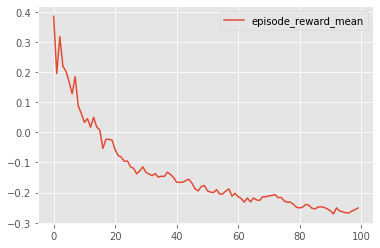

In [15]:
#Now you can plot the reward results of your tuner.
dfs = analysis.trial_dataframes

ax = None
for d in dfs.values():
    ax = d.episode_reward_mean.plot(ax=ax, legend=True)

## Restoring an already existing agent that I tuned

In [54]:
import os
logdir = analysis.get_best_logdir("episode_reward_mean", mode="max")
trainer.restore(os.path.join(logdir, "checkpoint_20/checkpoint-20"))

2020-03-03 21:07:13,610	WARNING trainable.py:210 -- Getting current IP.
2020-03-03 21:07:13,612	INFO trainable.py:416 -- Restored on 192.168.0.89 from checkpoint: /Users/jasonfiacco/ray_results/DQN5/DQN_ray_trading_env_d4e8318c_0_lr=1e-06_2020-03-03_18-36-40z5lmzyb2/checkpoint_20/checkpoint-20
2020-03-03 21:07:13,613	INFO trainable.py:423 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': 20160, '_time_total': 2834.3252534866333, '_episodes_total': 28}


In [16]:
trainer.restore("/Users/jasonfiacco/ray_results/DQN4/DQN_ray_trading_env_fedb24f0_0_lr=1e-06_2020-03-03_15-46-02kzbdv53d/checkpoint_5/checkpoint-5")

ValueError: Cannot feed value of shape (990, 256) for Tensor 'default_policy/Placeholder_default_policy/fc_1/kernel:0', which has shape '(1875, 256)'

## Testing

In [55]:
#Set up a testing environment with test data.
test_env = TradingEnvironment(
    feed=feed,
    portfolio=portfolio,
    action_scheme='simple',
    reward_scheme='simple',
    window_size=15,
    enable_logger=False,
    renderers = 'screenlog'
)

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/gym/logger.py:30: UserWarning:

WARN: Box bound precision lowered by casting to float32



In [56]:
for episode_num in range(1):
    state = test_env.reset()
    done = False
    cumulative_reward = 0
    step = 0
    action = trainer.compute_action(state)

    while not done:
        action = trainer.compute_action(state)
        state, reward, done, results = test_env.step(action)

        cumulative_reward += reward
        
        #Render every 100 steps:
        if step % 100 == 0:
            test_env.render()
            
        step += 1
        
print("Cumulative reward: ", cumulative_reward)

[2020-03-03 9:07:31 PM] Step: 1
[2020-03-03 9:07:33 PM] Step: 101
[2020-03-03 9:07:36 PM] Step: 201
[2020-03-03 9:07:39 PM] Step: 301
[2020-03-03 9:07:42 PM] Step: 401
[2020-03-03 9:07:45 PM] Step: 501
[2020-03-03 9:07:47 PM] Step: 601
[2020-03-03 9:07:50 PM] Step: 701
Cumulative reward:  -0.08712548561979405


## Plot

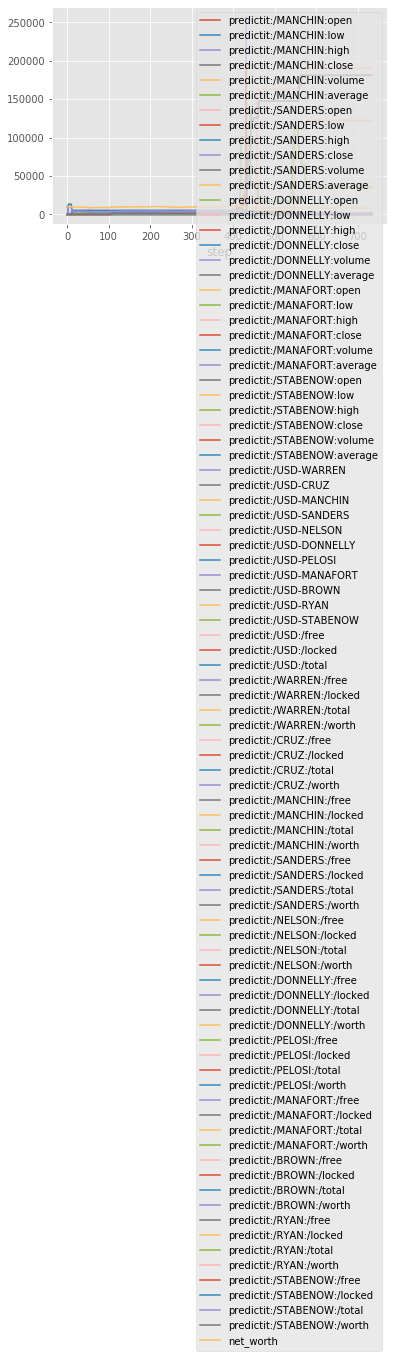

In [57]:
%matplotlib inline

portfolio.performance.plot()

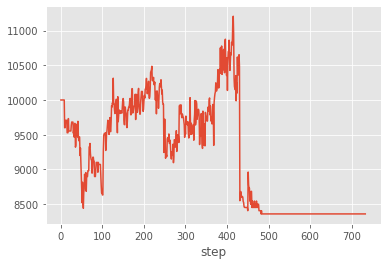

In [58]:
portfolio.performance.net_worth.plot()

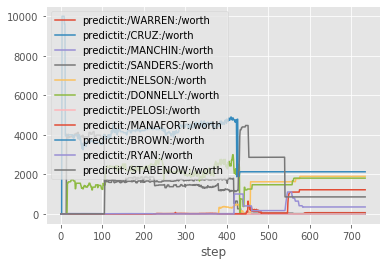

In [59]:
#Plot the total balance in each type of item
p = portfolio.performance
p2 = p.iloc[:, :]
weights = p2.loc[:, [("/worth" in name) for name in p2.columns]]
weights.iloc[:, :].plot()


## Try Plotly Render too

In [ ]:
from tensortrade.environments.render import PlotlyTradingChart
from tensortrade.environments.render import FileLogger

chart_renderer = PlotlyTradingChart(
    height = 800
)

file_logger = FileLogger(
    filename='example.log',  # omit or None for automatic file name
    path='training_logs'  # create a new directory if doesn't exist, None for no directory
)

In [ ]:
price_history.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume']

In [ ]:
env = TradingEnvironment(
    feed=feed,
    portfolio=portfolio,
    action_scheme='managed-risk',
    reward_scheme='risk-adjusted',
    window_size=20,
    price_history=price_history,
    renderers = [chart_renderer, file_logger]
)

In [ ]:
from tensortrade.agents import DQNAgent

agent = DQNAgent(env)
agent.train(n_episodes=1, n_steps=1000, render_interval=1)

## Extra Stuff

In [ ]:
apath = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/jasonfiacco-selectedmarkets-mytickers.xlsx"
df = pd.read_excel(apath, skiprows=2)
jason_tickers = df.iloc[:, 5].tolist()
descriptions = df.iloc[:, 1].tolist()

for ticker, description in zip(jason_tickers, descriptions):
    l = "{} = Instrument(\'{}\', 2, \'{}\')".format(ticker, ticker, description)
    print(l)